<a href="https://colab.research.google.com/github/nguyenkhoi6394/500cities/blob/main/500_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 500 cities Project

# **Introduction**

This is my final project in Statistics for Business Analytics course (Uconn MBA). The project aims at exploring data from 500Cities initiative to learn about health outcome in the USA. 


The 500 Cities project is a collaboration between CDC, the Robert Wood Johnson Foundation, and the CDC Foundation. The purpose of the 500 Cities Project is to provide city- and census tract-level small area estimates for chronic disease risk factors, health outcomes, and clinical preventive service use for the largest 500 cities in the United States. These small area estimates will allow cities and local health departments to better understand the burden and geographic distribution of health-related variables in their jurisdictions, and assist them in planning public health interventions.

Note: This project has been replaced by a new initiative: PLACES. Further information can be found here: https://www.cdc.gov/places/index.html





# **Project Goals**

In this project, I chose STROKE_rate per cities as the dependent variable. I will do data exploration and statistical testing to find interesting insights related to stroke. I will also develop a predictive model for Stroke rate based on 4 group of features: preventative measures, healthy lifestyle, demographic and other health outcome variables.

My main target is to predict the stroke rate per cities; however, I am also interested in learning the impact of health factors and lifstyle behaviors towards risk of stroke. 

According to Better Health Channel (link: https://www.betterhealth.vic.gov.au/health/ConditionsAndTreatments/stroke-risk-factors-and-prevention), stroke can be aggravated by the following factors:

- high blood pressure
- cigarette smoking
- diabetes
- obesity
-lack of exercise

As indicated by USA CDC, the risk of stroke of black people almost doubled that of the whites. Stroke rate varies with race and ethnicity. Thus, I will also incorporate demographic features into my linear regression to investigate the relationship.

Finally, I will add data related to number of hospitals per capita to measure access of healthcare since CDC pointed out that early treatment helps to reduce risk of stroke.


 # **External Data and Joining**

Firstly, I load 500 cities data. This is a rather clean version vs. the downloaded dataset from website since some variables related to range of measures have been removed.


In [1]:
#Load 500 cities data
urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/500Cities_cleandata_ReadyForEDA.csv'

df <- read.csv(url(urlfile))
head(df,10)

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,⋯,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,⋯,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,⋯,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,⋯,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,⋯,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"
6,FL,Pembroke Pines,1255775,154750,21.4,20.8,17.1,30.3,76.3,6.3,⋯,26.4,82.7,10.9,25.7,82.2,11.6,35.8,3.1,14.1,"(26.01273875340, -80.3384522664)"
7,NJ,Trenton,3474000,84913,25.4,23.9,14.4,35.4,74.4,4.6,⋯,42.2,79.7,17.0,38.9,84.9,17.8,45.7,4.4,26.1,"(40.22372899810, -74.7639943311)"
8,CO,Pueblo,862000,106595,19.9,28.3,14.3,31.6,73.3,6.6,⋯,24.2,72.9,13.5,30.0,81.3,16.1,34.2,3.8,17.7,"(38.27339572510, -104.612001218)"
9,WI,Racine,5566000,78860,16.6,25.1,21.7,32.8,73.6,5.9,⋯,25.4,77.7,14.0,37.4,82.6,14.1,39.8,3.5,16.9,"(42.72745994940, -87.8134530240)"


We can have a look at the available variables


In [2]:
str(df)

'data.frame':	500 obs. of  33 variables:
 $ StateAbbr             : chr  "CA" "FL" "CA" "CA" ...
 $ PlaceName             : chr  "Folsom" "Largo" "Berkeley" "Napa" ...
 $ PlaceFIPS             : int  624638 1239425 606000 650258 1269700 1255775 3474000 862000 5566000 5303180 ...
 $ Population2010        : int  72203 77648 112580 76915 84439 154750 84913 106595 78860 70180 ...
 $ ACCESS2_CrudePrev     : num  7.5 19.6 7.7 12.3 22.8 21.4 25.4 19.9 16.6 12.2 ...
 $ ARTHRITIS_CrudePrev   : num  16.9 30.6 15.1 20.7 22.8 20.8 23.9 28.3 25.1 23.3 ...
 $ BINGE_CrudePrev       : num  21.8 16.9 19.6 19.2 16.3 17.1 14.4 14.3 21.7 17.6 ...
 $ BPHIGH_CrudePrev      : num  25.7 36.1 20.9 28.1 33.3 30.3 35.4 31.6 32.8 27.8 ...
 $ BPMED_CrudePrev       : num  64.8 81 68.2 70.2 76.7 76.3 74.4 73.3 73.6 66.2 ...
 $ CANCER_CrudePrev      : num  5.8 9 4.9 6.5 6.5 6.3 4.6 6.6 5.9 5.9 ...
 $ CASTHMA_CrudePrev     : num  8.6 7.9 8.8 8.9 8 7.1 10.8 9.7 10.1 10.1 ...
 $ CHD_CrudePrev         : num  4.1 9.8 3.7 

In order to get demographic variables, I loaded an external dataset: 2017 Census Tract data from Kaggle Data Source sharing. This dataset contains information about 2017 population, rate of white, black, hispanic people... per county level

In [3]:
#Load 2017 census data that contains demographic information

urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/acs2017_census_tract_data.csv'
demo_data<-read.csv(url(urlfile))
head(demo_data,10)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,⋯,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
2,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,⋯,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
3,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,⋯,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
4,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,⋯,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
5,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,⋯,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
6,1001020600,Alabama,Autauga County,3620,1765,1855,3.0,70.7,25.1,0.0,⋯,0.7,3.5,8.0,21.1,1364,84.0,14.1,1.9,0.0,6.1
7,1001020700,Alabama,Autauga County,3420,1459,1961,4.0,78.0,13.7,0.6,⋯,0.0,0.0,0.0,16.4,1418,77.4,17.6,5.0,0.0,16.9
8,1001020801,Alabama,Autauga County,2913,1495,1418,4.2,86.3,7.1,1.5,⋯,0.0,0.7,5.2,24.6,1369,72.7,17.5,8.8,1.0,7.2
9,1001020802,Alabama,Autauga County,11333,5488,5845,1.4,81.8,15.3,0.0,⋯,0.0,0.0,2.2,27.4,4857,70.1,22.5,7.4,0.0,2.2


Now the challenge comes. I need to merge demo data with the health data (df). However, demo data only has observations by TractID and County while health data consists of instances per PlaceFIPS or cities.

In order to resolve this problem, I will have to use another dataset from 500 cities, which is the census-tract level data that has information of both PlaceFIPS and TractID, aka TractFIPS.


In [4]:
#Load census tract data of 500 cities that has both Place FIPS and TractID
urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv'
census_data<-read.csv(url(urlfile))
head(census_data)

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,⋯,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",⋯,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
2,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",⋯,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
3,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",⋯,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
4,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",⋯,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
5,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",⋯,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"
6,AL,Birmingham,107000,1073000800,0107000-01073000800,3859,24.5,"(20.9, 28.3)",37.5,"(36.0, 39.0)",⋯,"(82.3, 87.2)",22.0,"(19.7, 24.2)",44.8,"(43.3, 46.1)",7.9,"( 7.1, 8.7)",28.4,"(20.3, 37.2)","(33.54969778900, -86.8330944744)"


With the new dataset, I can add a new column: PlaceFIPS to the demo data


In [5]:
#match PlaceFIPS from 500 cities census tract data to 2017 demographic data
demo_data<-merge(demo_data,census_data[,3:4],by.x='TractId',by.y='TractFIPS')

head(demo_data[,c(1:3,ncol(demo_data))],10)

,TractId,State,County,PlaceFIPS
,<dbl>,<chr>,<chr>,<int>
1,1073000100,Alabama,Jefferson County,107000
2,1073000300,Alabama,Jefferson County,107000
3,1073000400,Alabama,Jefferson County,107000
4,1073000500,Alabama,Jefferson County,107000
5,1073000700,Alabama,Jefferson County,107000
6,1073000800,Alabama,Jefferson County,107000
7,1073001100,Alabama,Jefferson County,107000
8,1073001200,Alabama,Jefferson County,107000
9,1073001400,Alabama,Jefferson County,107000


Since 2017 demographic data contains very detailed level of data, a PlaceFIPS may have many different census-tract data (TractID). 

Hence, we need to aggregate census-tract data at the level of PlaceFIPS to match with 500 cities data.

In order to get aggregate data, we calculate using weighted average on population.

For example:

PlaceFIPS of 100200 has 2 census-tracts: <br>
A has population of 400 and the income per capita is $\$500$ <br>
B has population of 600 and the income per capita is $\$200$

The average Income per capita for 100200 is: <br>
(400$*$500+200$*$600)/1000= $\$320$


In [6]:
to_agg<-c('Hispanic','White','Black','IncomePerCap') #these are the features we incorporate into 500 cities data
col_list<-c() 
for (i in to_agg) 
                {col_name<-paste(i,'multiply')
                 demo_data[col_name]<-demo_data[i]*demo_data$TotalPop #this is to calculate the numerator
                 col_list<-c(col_list,col_name)
                 }
head(demo_data,20)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PlaceFIPS,Hispanic multiply,White multiply,Black multiply,IncomePerCap multiply
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1073000100,Alabama,Jefferson County,3114,1605,1509,9.8,16.4,73.3,0.0,⋯,89.7,3.9,2.5,3.9,10.7,107000,30517.2,51069.6,228256.2,46582326
2,1073000300,Alabama,Jefferson County,2124,1222,902,31.5,10.9,53.2,1.7,⋯,94.0,5.2,0.0,0.8,13.3,107000,66906.0,23151.6,112996.8,30332844
3,1073000400,Alabama,Jefferson County,3515,1817,1698,0.0,12.7,86.9,0.0,⋯,86.8,10.1,3.2,0.0,21.2,107000,0.0,44640.5,305453.5,56517685
4,1073000500,Alabama,Jefferson County,3060,1376,1684,2.0,7.7,90.0,0.0,⋯,85.7,6.3,8.1,0.0,21.0,107000,6120.0,23562.0,275400.0,42925680
5,1073000700,Alabama,Jefferson County,2739,1326,1413,1.9,0.0,97.2,0.0,⋯,85.6,10.0,3.7,0.8,17.9,107000,5204.1,0.0,266230.8,27877542
6,1073000800,Alabama,Jefferson County,3071,1641,1430,1.6,1.4,97.0,0.0,⋯,78.7,8.3,13.0,0.0,10.8,107000,4913.6,4299.4,297887.0,46663845
7,1073001100,Alabama,Jefferson County,4636,1833,2803,0.0,2.0,98.0,0.0,⋯,77.0,23.0,0.0,0.0,6.2,107000,0.0,9272.0,454328.0,100429668
8,1073001200,Alabama,Jefferson County,2803,1275,1528,6.8,0.6,92.6,0.0,⋯,78.0,10.9,10.0,1.1,13.2,107000,19060.4,1681.8,259557.8,50863238
9,1073001400,Alabama,Jefferson County,2086,1074,1012,7.2,0.9,91.4,0.1,⋯,76.6,19.4,4.0,0.0,10.2,107000,15019.2,1877.4,190660.4,40779214


In [7]:
name<-data.frame(col_list,to_agg,stringsAsFactors = FALSE) #store the name of used features
name

col_list,to_agg
<chr>,<chr>
Hispanic multiply,Hispanic
White multiply,White
Black multiply,Black
IncomePerCap multiply,IncomePerCap


In [8]:
byplace<-aggregate(demo_data[,c(which(colnames(demo_data)=='TotalPop'),39:42)],by=list(demo_data$PlaceFIPS),sum)
#group by data by PlaceFIPS
colnames(byplace)[1]='PlaceFIPS'

#get the average by dividing the numerator by the denominator, which is TotalPop of each PlaceFIPS
for (i in seq_len(nrow(name))){
                     col_name<-name[i,'to_agg']
                     byplace[col_name]<-byplace[name[i,'col_list']]/byplace$TotalPop
                      }

byplace
           

PlaceFIPS,TotalPop,Hispanic multiply,White multiply,Black multiply,IncomePerCap multiply,Hispanic,White,Black,IncomePerCap
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15003,990035,9506189.0,18537228.4,2157822.8,NA,9.601872,18.723811,2.179542,NA
107000,329751,1208685.2,11883861.6,18945627.2,9301484712,3.665448,36.038895,57.454343,28207.60
135896,158362,698399.2,11324862.4,2717994.7,6723879468,4.410144,71.512499,17.163175,42458.92
137000,264221,1381402.3,16527293.3,7028555.5,8759025571,5.228208,62.551021,26.601048,33150.38
150000,238523,669552.4,11643496.4,10614438.3,6059173816,2.807077,48.814984,44.500691,25402.89
151000,216347,749277.2,7386512.7,12547622.9,5697258122,3.463312,34.141970,57.997675,26333.89
177256,135337,482521.0,7441283.4,5151477.3,3261990148,3.565330,54.983363,38.064072,24102.72
203000,298225,2642985.3,17652088.6,1567073.4,11623951539,8.862387,59.190506,5.254668,38977.12
404720,90288,4566565.9,2986836.4,870643.0,2004285725,50.577772,33.081211,9.642954,22198.81


In [9]:
#merge the used features into 500 cities data
df2<-merge(df,byplace[,c(1:2,7:10)],by='PlaceFIPS')
head(df2,10)

,PlaceFIPS,StateAbbr,PlaceName,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,15003,HI,Honolulu,953207,10.1,20.0,17.7,31.5,75.4,5.5,⋯,9.4,46.9,2.5,6.8,"(21.45880393050, -157.973296737)",990035,9.601872,18.72381,2.179542,NA
2,107000,AL,Birmingham,212237,19.2,29.3,13.2,43.8,81.3,5.6,⋯,16.3,41.5,5.0,22.8,"(33.52756637730, -86.7988174678)",329751,3.665448,36.03889,57.454343,28207.60
3,135896,AL,Hoover,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,9.9,32.9,2.2,8.3,"(33.37676027290, -86.8051937568)",158362,4.410144,71.51250,17.163175,42458.92
4,137000,AL,Huntsville,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,13.2,37.8,3.4,14.2,"(34.69896926710, -86.6387042882)",264221,5.228208,62.55102,26.601048,33150.38
5,150000,AL,Mobile,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,15.7,39.1,4.5,19.7,"(30.67762486480, -88.1184482714)",238523,2.807077,48.81498,44.500691,25402.89
6,151000,AL,Montgomery,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,14.5,38.0,4.2,18.1,"(32.34726453330, -86.2677059552)",216347,3.463312,34.14197,57.997675,26333.89
7,177256,AL,Tuscaloosa,90468,16.4,24.1,17.2,32.6,73.6,4.6,⋯,13.1,39.0,3.1,18.9,"(33.23360839510, -87.5268004073)",135337,3.565330,54.98336,38.064072,24102.72
8,203000,AK,Anchorage,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,10.6,31.3,2.3,12.9,"(61.14986873100, -149.111113424)",298225,8.862387,59.19051,5.254668,38977.12
9,404720,AZ,Avondale,76238,19.3,19.2,17.7,24.8,65.9,4.1,⋯,12.4,38.1,2.4,14.7,"(33.38583674050, -112.323626619)",90288,50.577772,33.08121,9.642954,22198.81


In [10]:
dim(df2)

[1] 500  38

As already mentioned in the literature review, I will also look at the healthcare access by measuring the hospital per capita. Thus, I use the dataset related to hospital information in the USA(provided by Kaggle)

Note: Some pre-transformation had been done in Excel before uploading to Github. There is a new column called PlaceName_cleaned to ensure that the city name is accurate and match with the format of 500 cities data.

In [11]:
urlfile<-'https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/Hospitals_cleandata%20-%20Hospitals_cleandata.csv'
hospital_data<-read.csv(url(urlfile))
head(hospital_data,10)

,ID,NAME,CITY,STATE,TYPE,STATUS,COUNTY,OWNER,BEDS,PlaceName_Cleaned
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXANDER CAMPUS,BAYTOWN,TX,GENERAL ACUTE CARE,OPEN,HARRIS,NON-PROFIT,182,Baytown
2,129043230,"WOODS AT PARKSIDE,THE",COLUMBUS,OH,SPECIAL,OPEN,FRANKLIN,PROPRIETARY,50,Columbus
3,130045404,DAYTON CHILDREN'S HOSPITAL,DAYTON,OH,CHILDREN,OPEN,MONTGOMERY,NON-PROFIT,155,Dayton
4,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,BOARDMAN,OH,LONG TERM CARE,OPEN,MAHONING,PROPRIETARY,45,Boardman
5,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,DAYTON,OH,PSYCHIATRIC,OPEN,MONTGOMERY,PROPRIETARY,32,Dayton
6,130774801,CHG CORNERSTONE HOSPITAL OF OKLAHOMA,SHAWNEE,OK,LONG TERM CARE,OPEN,POTTAWATOMIE,PROPRIETARY,34,Shawnee
7,131074538,MARY HURLEY HOSPITAL,COALGATE,OK,GENERAL ACUTE CARE,OPEN,COAL,NON-PROFIT,20,Coalgate
8,5258701,TRINITY HOSPITALS,MINOT,ND,GENERAL ACUTE CARE,OPEN,WARD,NON-PROFIT,251,Minot
9,10527016,LIFEBRITE COMMUNITY HOSPITAL OF STOKES,DANBURY,NC,GENERAL ACUTE CARE,OPEN,STOKES,PROPRIETARY,93,Danbury


Next, I count the number of hospitals in each city


In [12]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# count the total numbers of hopitals in each state 
library(dplyr)
numberofhospitals =hospital_data%>%
count(PlaceName_Cleaned,sort=TRUE)
numberofhospitals


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




PlaceName_Cleaned,n
<chr>,<int>
Houston,61
San Antonio,44
Chicago,40
New York,39
Columbus,35
Philadelphia,35
Dallas,33
Los Angeles,33
Las Vegas,29


In [14]:
# make a new dataset from hospital_data through adding numbers of hospitals in each state  
hospital_data2=as.data.frame(numberofhospitals)
colnames(hospital_data2)[2]='Num_Hospitals'
hospital_data2

PlaceName_Cleaned,Num_Hospitals
<chr>,<int>
Houston,61
San Antonio,44
Chicago,40
New York,39
Columbus,35
Philadelphia,35
Dallas,33
Los Angeles,33
Las Vegas,29


Now combine this new dataframe with our current dataset (df2)


In [15]:
#merge hopital_data2 into 500 citites combined demographics data
df3=merge(df2,hospital_data2,by.x='PlaceName',by.y='PlaceName_Cleaned',all.x=T)
head(df3,10)

,PlaceName,PlaceFIPS,StateAbbr,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Abilene,4801000,TX,117063,22.6,23.6,17.9,30.3,75.0,5.8,⋯,33.2,3.2,15.7,"(32.45465108980, -99.7383043723)",130741,25.866044,60.121836,9.395042,23502.72,6
2,Akron,3901000,OH,199110,12.3,29.1,15.4,36.5,78.4,6.1,⋯,42.9,4.2,21.6,"(41.08014449420, -81.5219213688)",232863,2.200903,63.309527,26.831555,23724.44,7
3,Alameda,600562,CA,73812,7.3,18.7,17.4,25.8,72.6,6.1,⋯,33.7,2.3,7.5,"(37.76508490310, -122.266489842)",78246,11.549796,42.728373,7.327967,47229.34,4
4,Albany,3601000,NY,97856,11.0,22.9,18.5,28.9,72.8,5.3,⋯,37.7,3.0,14.5,"(42.66639696040, -73.7986826267)",98498,9.743970,50.597415,27.235942,27632.45,11
5,Albany,1301052,GA,77434,24.2,26.6,12.6,42.6,76.6,5.5,⋯,47.1,5.0,25.2,"(31.57760367660, -84.1763240815)",87325,2.562716,24.665562,70.041324,20101.05,11
6,Albuquerque,3502000,NM,545852,12.2,24.8,15.4,26.5,71.0,5.8,⋯,32.3,2.9,12.5,"(35.10550257710, -106.647447696)",614055,49.170487,39.518942,2.684335,28356.38,17
7,Alexandria,5101000,VA,139966,12.0,18.4,19.2,26.1,73.3,5.1,⋯,31.9,2.0,9.0,"(38.81873515570, -77.0867762661)",154710,16.729142,51.801419,21.690296,57018.61,12
8,Alhambra,600884,CA,83089,13.1,16.8,12.4,27.7,72.6,4.8,⋯,37.9,2.5,9.2,"(34.08397343830, -118.135514119)",85168,37.635699,8.602968,1.631748,27384.43,1
9,Allen,4801924,TX,84246,12.4,18.4,19.4,24.2,70.7,5.0,⋯,33.3,1.8,8.1,"(33.10870432340, -96.6735373763)",108590,10.366870,61.482575,8.982525,43033.14,2


In [16]:
dim(df3)

[1] 500  39

We now have all required data, from population, rate of white & black people, income per capita to number of hospitals per cities.


The final test is to clean some missing data.

In [17]:
#check null values 
na_count <-sapply(df3, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(df)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
PlaceName,0,0.000
PlaceFIPS,0,0.000
StateAbbr,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


Since we have some missing values on variables such as "Hispanic","IncomePerCap" and "Num_Hospitals", I will impute these N/A with the mean value of each variable per state.

I do not process for PAPTEST_CrudePrev since this variable is not relevant for the modelling step later.


In [18]:
#store columns with null value to impute
to_fill<-c("Hispanic","White","Black","IncomePerCap","Num_Hospitals")

In [19]:

for (x in to_fill) { #function to impute missing value
                     imputeNA <- function(DF, i,col) {
                                                      sel <- DF$StateAbbr == DF$StateAbbr[i]
                                                      imputed <- mean(DF[sel,col], na.rm = TRUE) #find the mean of that feature in the same state as the city with N/A
                                                      if (is.nan(imputed)) { # careful, there might be no other match
                                                          imputed <- NA}
                                                      return(imputed)}
                      #looping through the columns to fill na
                      for (iMissing in which(is.na(df3[x]))) {
                                                       df3[iMissing,x] <- imputeNA(df3, iMissing,x)}
                      }



In [20]:
df3$Num_Hospitals<-round(df3$Num_Hospitals)

To measure health care access in US cities, I create a new feature called Number of Hospitals per capita

In [21]:
df3['HospitalPerCap']=df3$Num_Hospitals/df3$TotalPop

In [22]:
#check null values again
na_count <-sapply(df3, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(df3)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
PlaceName,0,0.000
PlaceFIPS,0,0.000
StateAbbr,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


In [23]:
#There is 1 more missing value in IncomePerCap
df3[which(is.na(df3$IncomePerCap)),]

,PlaceName,PlaceFIPS,StateAbbr,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
189,Honolulu,15003,HI,953207,10.1,20,17.7,31.5,75.4,5.5,⋯,2.5,6.8,"(21.45880393050, -157.973296737)",990035,9.601872,18.72381,2.179542,NA,9,9.090588e-06


In [24]:
#The missing value is from Honolulu, simply because we do not have other cities in this state to get the mean
#As a result, we will impute this value using mean of the whole USA
df3[which(is.na(df3$IncomePerCap)),which(colnames(df3)=='IncomePerCap')]<-mean(df3$IncomePerCap,na.rm=T)

To measure outcome variable across regions, we also incorporate data that contains information about state per division in the USA

In [25]:
urlfile<-'https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/states.csv'
region_data<-read.csv(url(urlfile))
head(region_data,5)

,State,State.Code,Region,Division
,<chr>,<chr>,<chr>,<chr>
1,Alaska,AK,West,Pacific
2,Alabama,AL,South,East South Central
3,Arkansas,AR,South,West South Central
4,Arizona,AZ,West,Mountain
5,California,CA,West,Pacific


In [104]:
final_df<-merge(df3,region_data[,c(2:4)],by.x = 'StateAbbr',by.y='State.Code',all.x=T)
head(final_df,5)

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap,Region,Division
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,AK,Anchorage,203000,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,"(61.14986873100, -149.111113424)",298225,8.862387,59.19051,5.254668,38977.12,9,3.017856e-05,West,Pacific
2,AL,Mobile,150000,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,"(30.67762486480, -88.1184482714)",238523,2.807077,48.81498,44.500691,25402.89,7,2.934727e-05,South,East South Central
3,AL,Montgomery,151000,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,"(32.34726453330, -86.2677059552)",216347,3.463312,34.14197,57.997675,26333.89,9,4.159984e-05,South,East South Central
4,AL,Huntsville,137000,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,"(34.69896926710, -86.6387042882)",264221,5.228208,62.55102,26.601048,33150.38,7,2.649297e-05,South,East South Central
5,AL,Hoover,135896,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,"(33.37676027290, -86.8051937568)",158362,4.410144,71.51250,17.163175,42458.92,9,5.683182e-05,South,East South Central


In [105]:
#check null values again
na_count <-sapply(final_df, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(final_df)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
StateAbbr,0,0.000
PlaceName,0,0.000
PlaceFIPS,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


The dataset is now complete and ready for next step: Exploratory Data Analysis

In [28]:
head(final_df,5)

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap,Region,Division
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,AK,Anchorage,203000,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,"(61.14986873100, -149.111113424)",298225,8.862387,59.19051,5.254668,38977.12,9,3.017856e-05,West,Pacific
2,AL,Mobile,150000,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,"(30.67762486480, -88.1184482714)",238523,2.807077,48.81498,44.500691,25402.89,7,2.934727e-05,South,East South Central
3,AL,Montgomery,151000,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,"(32.34726453330, -86.2677059552)",216347,3.463312,34.14197,57.997675,26333.89,9,4.159984e-05,South,East South Central
4,AL,Huntsville,137000,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,"(34.69896926710, -86.6387042882)",264221,5.228208,62.55102,26.601048,33150.38,7,2.649297e-05,South,East South Central
5,AL,Hoover,135896,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,"(33.37676027290, -86.8051937568)",158362,4.410144,71.51250,17.163175,42458.92,9,5.683182e-05,South,East South Central


# **Exploratory Data Analysis**




**Target Variable: STROKE_CRUDEPREV**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



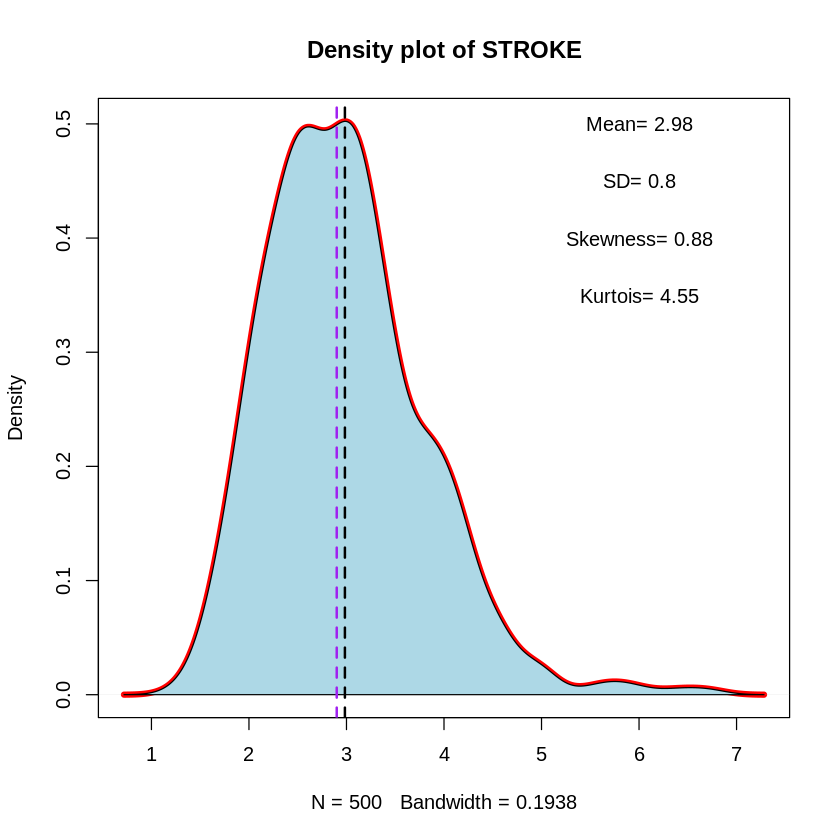

In [29]:
#Plot distribution of target variable
plot(density(final_df$STROKE_CrudePrev),col='red',lty=1,lwd=5,main='Density plot of STROKE')
polygon(density(final_df$STROKE_CrudePrev),col='lightblue')
abline(v=mean(final_df$STROKE_CrudePrev),col='black',lwd=2,lty=2)
abline(v=median(final_df$STROKE_CrudePrev),col='purple',lwd=2,lty=2)

#Import package to calculate skewness & kurtosis
install.packages('moments')
library(moments)

text(6,0.5,paste("Mean=",round(mean(final_df$STROKE_CrudePrev),2)))
text(6,0.45,paste("SD=",round(sd(final_df$STROKE_CrudePrev),2)))
text(6,0.4,paste("Skewness=",round(skewness(final_df$STROKE_CrudePrev),2)))
text(6,0.35,paste("Kurtois=",round(kurtosis(final_df$STROKE_CrudePrev),2)))


The density plot and skewness indicate that STROKE is moderately skewed to the right. Thus we need to check normality assumption for this variable before running regression model

Next I want to look at the statistics at Regional Division level

In [30]:
#Summary Table showing statistics of outcome variable per US division
f <- function(x) data.frame(mean = mean(x), median=median(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$Division, f))
summary_table

,mean,median,sd,size
,<dbl>,<dbl>,<dbl>,<int>
East North Central,3.316393,3.20,1.1396169,61
East South Central,3.625000,3.55,0.8910668,16
Middle Atlantic,3.588000,3.80,0.5637080,25
Mountain,2.618000,2.70,0.4893519,50
New England,2.965517,2.90,0.6872699,29
Pacific,2.640000,2.60,0.5315596,145
South Atlantic,3.415385,3.45,0.8171978,78
West North Central,2.831250,2.70,0.6625647,32
West South Central,2.893750,3.05,0.7102146,64


It can be seen that Middle Atlantic and East South Central have highest average stroke rate.

However, I decide to re-calculate the mean Stroke rate to adjust for different population in each states/divisions. A city with only 100 people having 50% stroke rate will distort the whole region number if we simply take the average of average.

In [31]:
final_copy<-final_df #create a new dataset so as not to make any accidental changes to the one for modeling.
final_copy['STROKE_pop']=final_copy$STROKE_CrudePrev/100*final_copy$TotalPop #We need to have the total number to calculate average at Division level
final_copy['Total_Income']=final_copy$IncomePerCap*final_copy$TotalPop


In [32]:
summary_table<-aggregate(final_copy[,which(colnames(final_copy) %in% c('STROKE_pop','Total_Income','TotalPop','Num_Hospitals'))],by=list(final_copy$Division),FUN=sum)
summary_table$STROKE_rate<-round(summary_table$STROKE_pop/summary_table$TotalPop,4) #mean of STROKE rate at Division level
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350
East South Central,4862225,183,180650.5,1.396010e+11,0.0372
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331
Mountain,12078908,299,327072.2,3.631690e+11,0.0271
New England,3552972,165,104669.7,1.144869e+11,0.0295
Pacific,31612411,608,832554.8,1.050212e+12,0.0263
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334
West North Central,5947966,288,173786.2,1.842369e+11,0.0292
West South Central,19308566,636,573026.8,5.626441e+11,0.0297


It can be seen that in the new adjusted number, East North Central and East South Central have highest average stroke rate. Thanksfully, there have not been any abrupt changes in the mean vs. previous means, indicating that there are not significant outliers in the stroke rate of each single city.










In [33]:
#Summary Table showing statistics of income per cap for divisions
summary_table$IncomeperCap<-round(summary_table$Total_Income/summary_table$TotalPop)
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate,IncomeperCap
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350,28420
East South Central,4862225,183,180650.5,1.396010e+11,0.0372,28711
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331,26407
Mountain,12078908,299,327072.2,3.631690e+11,0.0271,30066
New England,3552972,165,104669.7,1.144869e+11,0.0295,32223
Pacific,31612411,608,832554.8,1.050212e+12,0.0263,33222
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334,31054
West North Central,5947966,288,173786.2,1.842369e+11,0.0292,30975
West South Central,19308566,636,573026.8,5.626441e+11,0.0297,29140


The two highest average income per cap divisions are Pacific and New England, and those two divisons has relative low stroke rate.
In general, a division with a high income per cap means a low stroke rate.

In [34]:
# summary table showing statistics numbers of hospitals in  divisions
summary_table$HospitalsperCap<-summary_table$Num_Hospitals/summary_table$TotalPop
summary_table[,'HospitalsperCap']<-format(summary_table[,'HospitalsperCap'],scientific=F)
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate,IncomeperCap,HospitalsperCap
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350,28420,0.00003487051
East South Central,4862225,183,180650.5,1.396010e+11,0.0372,28711,0.00003763709
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331,26407,0.00001601930
Mountain,12078908,299,327072.2,3.631690e+11,0.0271,30066,0.00002475389
New England,3552972,165,104669.7,1.144869e+11,0.0295,32223,0.00004643999
Pacific,31612411,608,832554.8,1.050212e+12,0.0263,33222,0.00001923295
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334,31054,0.00003645696
West North Central,5947966,288,173786.2,1.842369e+11,0.0292,30975,0.00004841991
West South Central,19308566,636,573026.8,5.626441e+11,0.0297,29140,0.00003293875


Interestingly, New England has fewer hospitals per capita compared with other divisions of hospitals. But the Middle Atlantic and East South Central have more hospitals that tend to  have the highest stroke rate. 

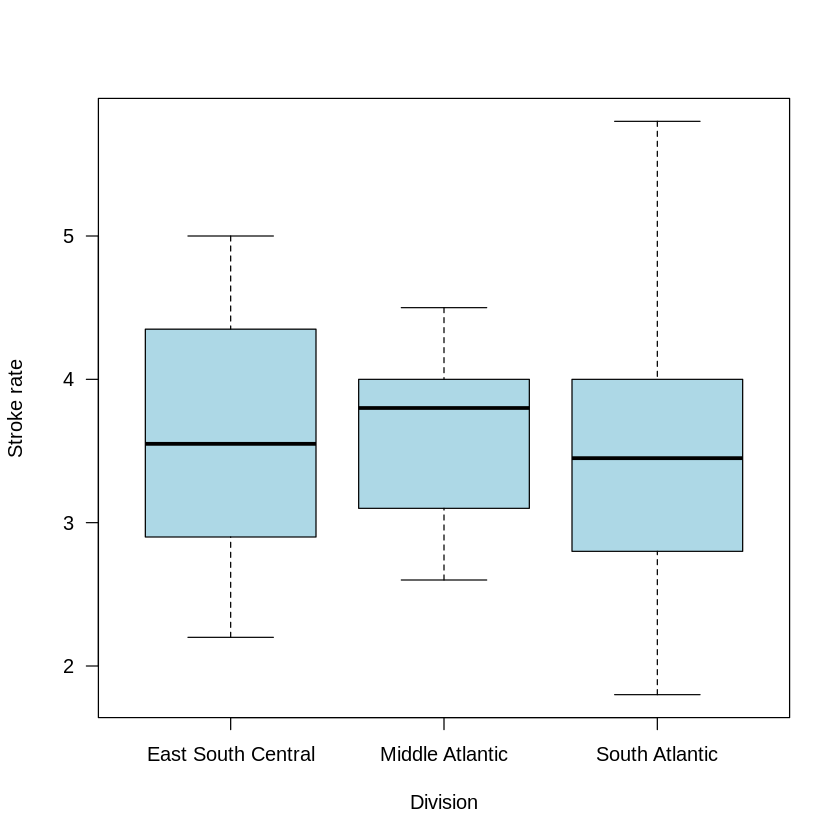

In [35]:
#draw box plot for 3 divisions with highest average stroke rate
row_<-c("East South Central","Middle Atlantic","South Atlantic")
x<-final_df$Division %in% row_
t<-final_df[x,]
boxplot(t$STROKE_CrudePrev~t$Division,las=1,xlab = 'Division',ylab='Stroke rate',col='lightblue')

Now we would like to look at the correlation between outcome variables and other features in the dataset

In [36]:
#Get only numeric values
x<-sapply(df3,is.numeric)
df_num<-df3[,x]
df_cor<-cor(df_num)

#Eliminate columns and rows of PlaceFPIS and PAPTEST, which we do not use
col_<-colnames(df_cor)!='PAPTEST_CrudePrev' & colnames(df_cor)!='PlaceFIPS'
row_<-rownames(df_cor)!='PAPTEST_CrudePrev' & rownames(df_cor)!='PlaceFIPS'
df_cor<-as.data.frame(df_cor[row_,col_])
df_cor<-df_cor[order(-df_cor$STROKE_CrudePrev),]
df_cor[abs(df_cor$STROKE_CrudePrev)>0.5,c('STROKE_CrudePrev','BPHIGH_CrudePrev')]


,STROKE_CrudePrev,BPHIGH_CrudePrev
,<dbl>,<dbl>
STROKE_CrudePrev,1.0000000,0.8982887
KIDNEY_CrudePrev,0.9391883,0.8155809
COPD_CrudePrev,0.9035220,0.8269253
BPHIGH_CrudePrev,0.8982887,1.0000000
CHD_CrudePrev,0.8961665,0.8322552
DIABETES_CrudePrev,0.8961045,0.8572805
PHLTH_CrudePrev,0.8739183,0.7446558
TEETHLOST_CrudePrev,0.8324700,0.7131885
LPA_CrudePrev,0.7775682,0.7300726


Just as expected, there exists high correlation between health issues such as Kidney, High Blood pressure and Diabetes with Stroke Rate. 

Regarding unhealthy behaviors, I also find that not having enough leisure time, smoke cigarettes and sleeping < 7 hours also correlate positively with  the dependent variable.

On the other hand, using clinical preventive services and higher rate of visiting dentists move in different direction with STROKE rate. 

Among the demographic variables that we add, rate of black people has positive correlation, while income per capita has negative correlation. These patterns really match with recent statistics about STROKE and are potential independent variables for our models.




In [37]:
#draw heatmap for variables that have absolute correlation with STROKE > 0.65 (to simply the chart)
name_list<-rownames(df_cor[abs(df_cor$STROKE_CrudePrev)>0.55,])
x<-rownames(df_cor) %in% name_list
y<-colnames(df_cor) %in% name_list

df_stroke<-df_cor[x,y]

In [38]:
install.packages('corrplot')
library('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



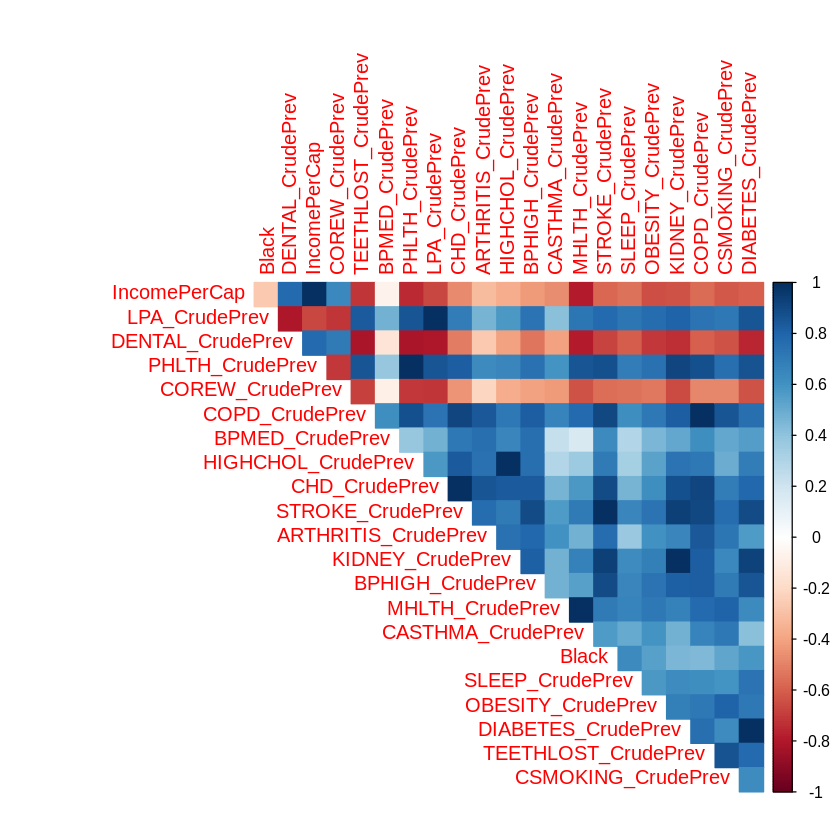

In [39]:
corrplot(as.matrix(df_stroke),method='color',type='upper',order='hclust',number.cex=2)

Many variables correlate strongly with each other. Hence, we should be prudent at including them in the linear models so as not to result in high collinearity.

In [40]:
#I want to see the pair plot between outcome variables and health-outcome features
col_list<-c('STROKE_CrudePrev','BPHIGH_CrudePrev','DIABETES_CrudePrev','KIDNEY_CrudePrev','TEETHLOST_CrudePrev','OBESITY_CrudePrev')
to_draw<-final_df[,col_list]


In [41]:
install.packages('psych')
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




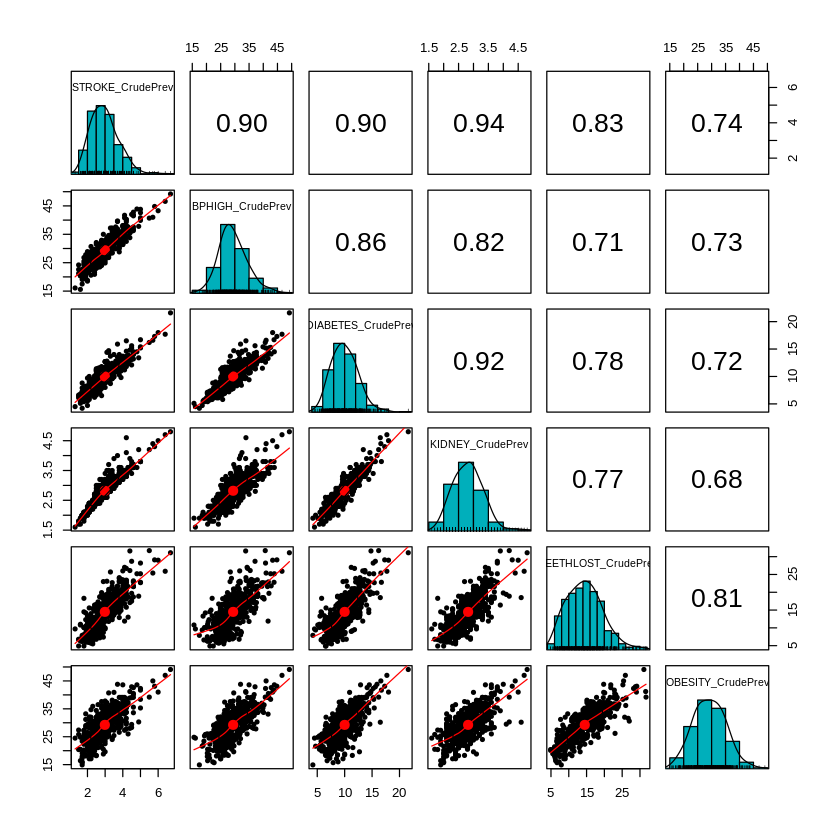

In [42]:
pairs.panels(to_draw[,], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB", 
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

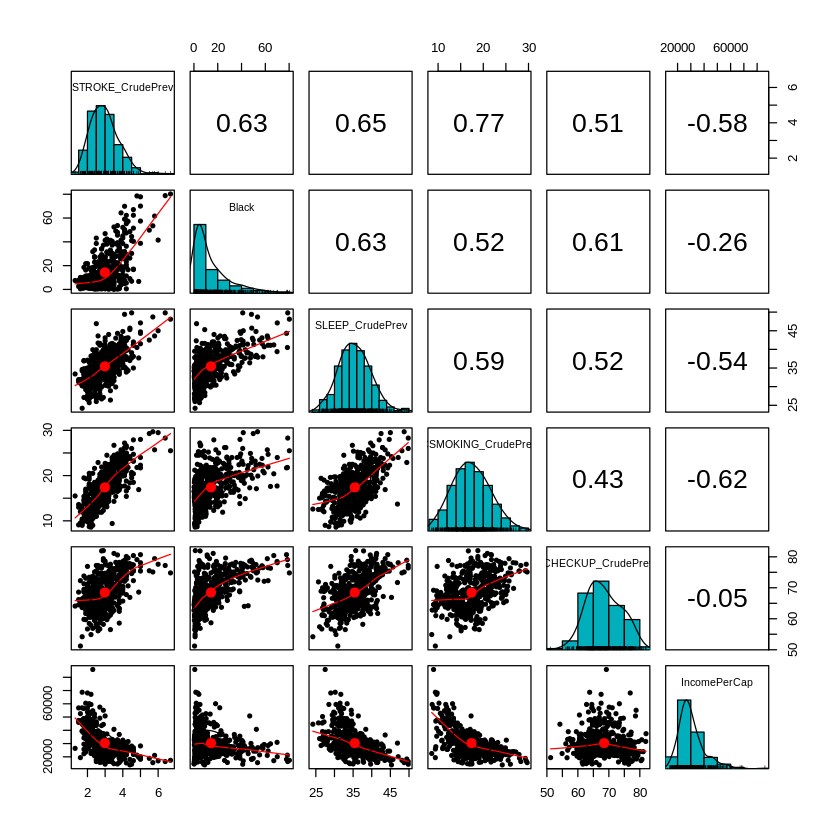

In [43]:
#I want to see the pair plot between outcome variables and lifestyle features +demographic variables
col_list<-c('STROKE_CrudePrev','Black','SLEEP_CrudePrev','CSMOKING_CrudePrev','CHECKUP_CrudePrev','IncomePerCap')
to_draw<-final_df[,col_list]

pairs.panels(to_draw[,], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB", 
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

# **Hypothesis Testing**

## One Sample Testing

In [44]:
f <- function(x) data.frame(mean = mean(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$Division, f))
summary_table

,mean,sd,size
,<dbl>,<dbl>,<int>
East North Central,3.316393,1.1396169,61
East South Central,3.625000,0.8910668,16
Middle Atlantic,3.588000,0.5637080,25
Mountain,2.618000,0.4893519,50
New England,2.965517,0.6872699,29
Pacific,2.640000,0.5315596,145
South Atlantic,3.415385,0.8171978,78
West North Central,2.831250,0.6625647,32
West South Central,2.893750,0.7102146,64


In [45]:
f <- function(x) data.frame(mean = mean(x), sd = sd(x),size=length(x))
summary_state<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$StateAbbr, f))
summary_state[which(rownames(summary_state)=='CA'),]

,mean,sd,size
,<dbl>,<dbl>,<int>
CA,2.604959,0.5381839,121


Most of the samples in Pacific came from California, with average stroke rate of 2.6.
We will do a hypothesis testing to test if there is any difference between population average of Cali and 2.64 (the Pacific average rate) at 0.05 significance level

<center> $H_0:\mu = 2.64$<br>
$H_1:\mu\neq 2.64$

To find the value of the test statistic, we use the $t$ distribution:<br>
<center> <center> $t$ = $\frac{\bar{X} - \mu}{s/\sqrt n}$</center>

In [46]:
X_bar<-summary_state['CA','mean']
sd<-summary_state['CA','sd']
n<-summary_state['CA','size']
mu<-2.64


X_bar
sd
n

[1] 2.604959

[1] 0.5381839

[1] 121

In [47]:
t_stat<-(X_bar-mu)/(sd/sqrt(n))
t_stat

[1] -0.7162135

In [48]:
alpha=0.1
crit_value<-qt(df=n-1,alpha/2,lower.tail = F)
c(-crit_value,crit_value)

[1] -1.657651  1.657651

Since t_stat is within the critical region, we fail to reject the null hypothesis and cannot conclude that the population average of stroke rate in California is different from 2.64

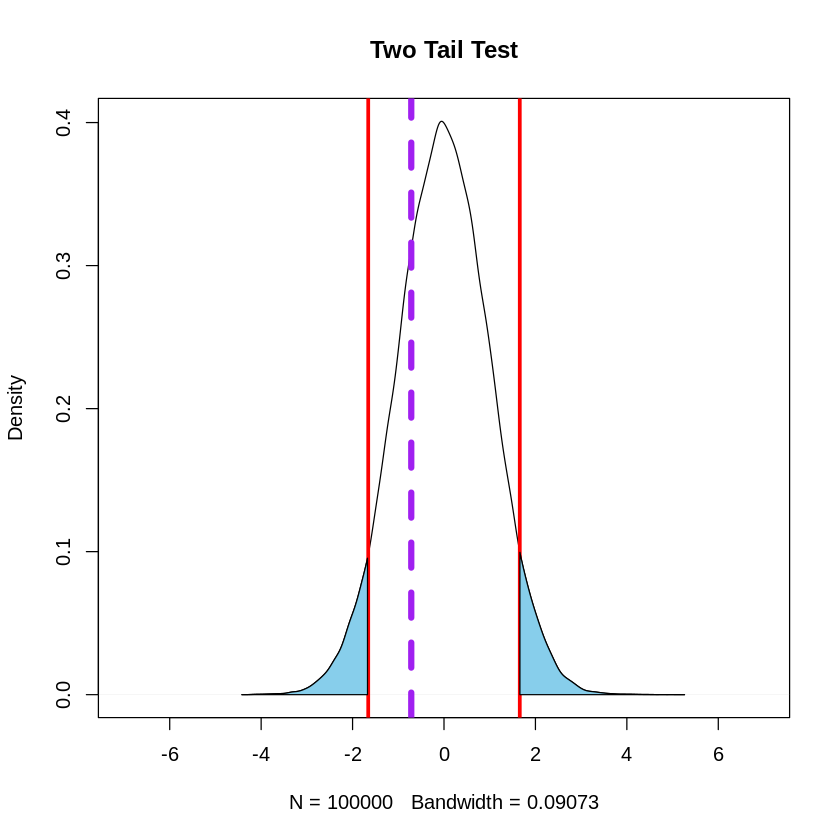

In [49]:
tmp = rt(100000, df=n-1)
plot(density(tmp), main='Two Tail Test',xlim = c(-7,7))
# add a line on the left tail
abline(v=crit_value, col='red', lwd=3)
# add the shaded polygon to the RIGHT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= crit_value))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# add a line on the left tail
abline(v=-crit_value, col='red', lwd=3)
# add the shaded polygon to the LEFT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= -Inf))
x2 <- max(which(dens$x <= -crit_value))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# now add our purple line
abline(v=t_stat, lty=2, lwd=5, col='purple')

## Two Sample Testing

Looking at the average stroke rate, we can find that the stroke incidences are highest in South East Region with most states belonging to Stroke Belt.

Now we will do a hypothesis to test if mean of stroke belt proportion in East South Central (3.6) is higher than East North Central (3.3)

**Step 1:** State the null hypothesis and the alternate hypothesis 
<center> $H_0$:$\mu_1$ $\leq$ $\mu_2$<br>
$H_1$:$\mu_1$ $>$ $\mu_2$</center>

In which: <br>
$\mu_1$ is the mean of stroke rate in East South Central <br>
$\mu_2$ is the mean of stroke rate in East North Central 


In [50]:
X1<-summary_table['East South Central','mean']
X2<-summary_table['East North Central','mean']
s1<-summary_table['East South Central','sd']
s2<-summary_table['East North Central','sd']
n1<-summary_table['East South Central','size'] #sample size=number of cities
n2<-summary_table['East North Central','size']

In [51]:
X1
X2

[1] 3.625

[1] 3.316393

In [52]:
t_stat<-(X1-X2)/sqrt(s1^2/n1+s2^2/n2)
df<-trunc(((s1^2/n1+s2^2/n2)^2)/((s1^2/n1)^2/(n1-1)+(s2^2/n2)/(n2-1)))
t_stat

[1] 1.158869

In [53]:
#Critical area
alpha=0.1
crit_value<-qt(df=df,alpha,lower.tail = F)
crit_value

[1] 1.383029

In [54]:
p_val<-pt(df=df,t_stat,lower.tail = F)
p_val

[1] 0.1381665

Given that t_stat $<$ critical value and p_value $>$ significance value, we fail to reject the null hypothesis and cannot conclude that the mean of stroke rate in East South Central is higher than that in East North Central

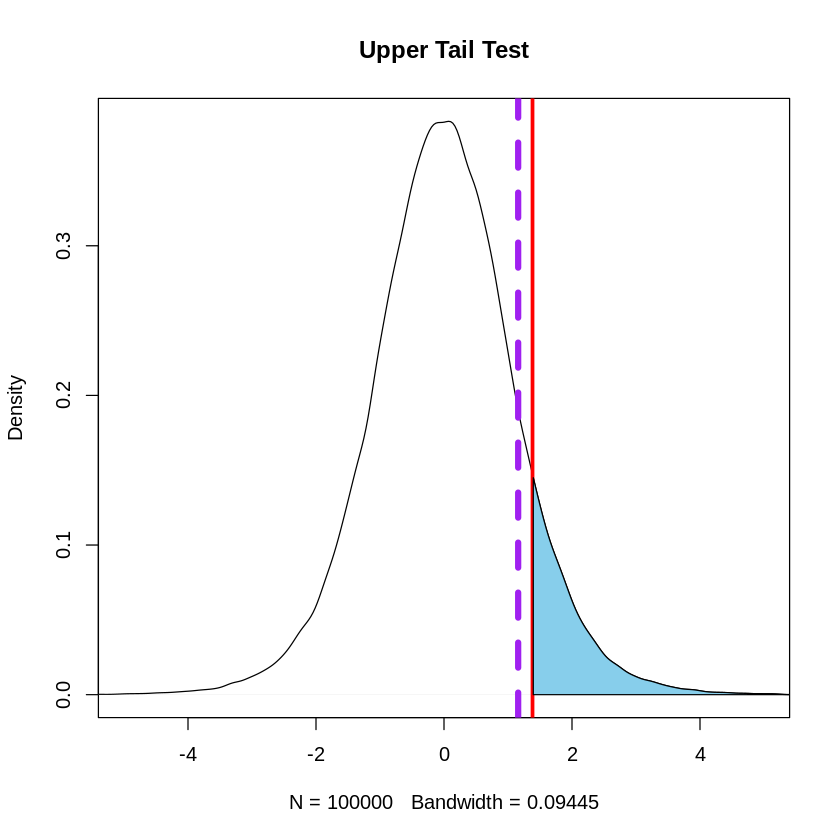

In [55]:
tmp = rt(100000,df=df)
plot(density(tmp), main='Upper Tail Test',xlim=c(-5,5))
abline(v=crit_value, col='red', lwd=3) # add a xritical value on the left tail
dens = density(tmp) # add the shaded polygon to the right
x1 <- min(which(dens$x >= crit_value))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# now add our purple line
abline(v=t_stat, lty=2, lwd=5, col='purple')


# **Modeling**

## Linear-full variables

Before fitting models, we split current dataset into train and test set. Thus we can run the model on the train part and validate its performance on the test set. 

After selecting the best possible model with valid features, we can fit on the whole dataset.


In [56]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [57]:
set.seed(12345)
trainIndex <- createDataPartition(final_df$STROKE_CrudePrev, p = .85, #split 85% for training data and 15% for testing data
                                  list = FALSE, 
                                  times = 1)

train<-final_df[trainIndex,]
test<-final_df[-trainIndex,]

In [58]:
colnames(final_df)

[1] "StateAbbr"              "PlaceName"              "PlaceFIPS"             
 [4] "Population2010"         "ACCESS2_CrudePrev"      "ARTHRITIS_CrudePrev"   
 [7] "BINGE_CrudePrev"        "BPHIGH_CrudePrev"       "BPMED_CrudePrev"       
[10] "CANCER_CrudePrev"       "CASTHMA_CrudePrev"      "CHD_CrudePrev"         
[13] "CHECKUP_CrudePrev"      "CHOLSCREEN_CrudePrev"   "COLON_SCREEN_CrudePrev"
[16] "COPD_CrudePrev"         "COREM_CrudePrev"        "COREW_CrudePrev"       
[19] "CSMOKING_CrudePrev"     "DENTAL_CrudePrev"       "DIABETES_CrudePrev"    
[22] "HIGHCHOL_CrudePrev"     "KIDNEY_CrudePrev"       "LPA_CrudePrev"         
[25] "MAMMOUSE_CrudePrev"     "MHLTH_CrudePrev"        "OBESITY_CrudePrev"     
[28] "PAPTEST_CrudePrev"      "PHLTH_CrudePrev"        "SLEEP_CrudePrev"       
[31] "STROKE_CrudePrev"       "TEETHLOST_CrudePrev"    "Geolocation"           
[34] "TotalPop"               "Hispanic"               "White"                 
[37] "Black"                  "IncomePerCap"           "Num_Hospitals"         
[40] "HospitalPerCap"         "Region"                 "Division"

In [59]:
#check the size of each dataset
dim(train)
dim(test)

[1] 426  42

[1] 74 42

I first tried to use all variables that make sense to build linear model.<br>
The selected variables based on literature review and exploratory analysi are:


1) Health Outcome Variables:
- DIABETES_CrudePrev: Diagnosed diabetes among adults aged ≥18 years
- BPHIGH_CrudePrev: High blood pressure among adults aged ≥18 years


2) Health Lifestyle
- CSMOKING_CrudePrev: Current smoking among adults aged ≥18 years
- LPA_CrudePrev: No leisure-time physical activity among adults aged ≥18 years
- SLEEP_CrudePrev: Sleeping less than 7 hours among adults aged ≥18 years
- BING_CrudePrev: Binge drinking prevalence among adults aged ≥18 years



3) Preventative Measures
- ACCESS2_CrudePrev: Current lack of health insurance among adults aged 18-64 years
-CHECKUP_CrudePrev: Visits to doctor for routine checkup within the past year among adults aged ≥18 years
-CHOLSCREEN_CrudePrev: Cholesterol screening among adults aged ≥18 years
-DENTAL_CrudePrev: Visits to dentist or dental clinic among adults aged ≥18 years

4) Demographic variables
- Hispanic: Rate of Hispanic people
- Black: Rate of Black people
- IncomePerCap: Income per Capita
- HospitalPerCap: although this feature does not show strong correlation with STROKE rate, I still include for testing.


In [164]:
# store list of selected variable
select_variable <-c('STROKE_CrudePrev','KIDNEY_CrudePrev','BINGE_CrudePrev','DIABETES_CrudePrev','TEETHLOST_CrudePrev','BPHIGH_CrudePrev','LPA_CrudePrev','CSMOKING_CrudePrev',
'SLEEP_CrudePrev','ACCESS2_CrudePrev','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','DENTAL_CrudePrev','Hispanic','Black','HospitalPerCap'
,'IncomePerCap')
# store used data for modeling
train_df <- train[,which(colnames(train) %in% select_variable)]
test_df <- test[,which(colnames(test) %in% select_variable)]
head(train_df,10)

,ACCESS2_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,HospitalPerCap
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.5,19.4,26.8,56.9,68.8,18.0,65.2,7.6,2.2,17.5,31.3,2.3,12.9,8.862387,5.254668,38977.12,3.017856e-05
2,17.0,14.7,42.0,74.6,75.9,20.2,58.7,15.2,3.4,29.5,39.1,4.5,19.7,2.807077,44.500691,25402.89,2.934727e-05
3,17.9,15.1,40.3,76.5,75.9,21.0,60.6,13.7,3.3,29.8,38.0,4.2,18.1,3.463312,57.997675,26333.89,4.159984e-05
4,15.3,14.1,36.8,69.6,76.8,18.5,61.2,12.2,3.0,26.0,37.8,3.4,14.2,5.228208,26.601048,33150.38,2.649297e-05
5,10.3,17.8,30.7,73.0,82.1,14.1,74.5,8.3,2.3,20.4,32.9,2.2,8.3,4.410144,17.163175,42458.92,5.683182e-05
6,16.4,17.2,32.6,71.6,65.5,20.7,59.6,10.3,2.6,27.0,39.0,3.1,18.9,3.565330,38.064072,24102.72,4.433377e-05
7,19.2,13.2,43.8,76.9,74.8,22.3,52.6,16.7,3.8,35.6,41.5,5.0,22.8,3.665448,57.454343,28207.60,4.245628e-05
8,10.6,18.5,24.9,64.7,64.2,20.5,59.5,6.6,2.1,24.6,34.2,2.1,15.6,7.289467,4.732988,30054.80,9.040923e-05
9,11.9,15.4,37.2,73.5,75.1,19.9,65.9,11.4,3.0,28.9,36.5,3.4,15.3,6.575397,40.413774,32297.42,6.649094e-05


In order to ensure that numeric features with high magnitude of values like Income Per Capita do not heavily distort the coefficients, we should scale the independent variables

In [165]:
cols<-c('KIDNEY_CrudePrev','BINGE_CrudePrev','DIABETES_CrudePrev','BPHIGH_CrudePrev','TEETHLOST_CrudePrev','LPA_CrudePrev','CSMOKING_CrudePrev',
'SLEEP_CrudePrev','ACCESS2_CrudePrev','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','DENTAL_CrudePrev','Hispanic','Black','HospitalPerCap'
,'IncomePerCap')
pre_proc_val <- preProcess(train_df[,cols], method = c("center", "scale"))

train_scaled<-train_df
test_scaled<-test_df
train_scaled[,cols] = predict(pre_proc_val, train[,cols])
test_scaled[,cols] = predict(pre_proc_val, test[,cols])

head(train_scaled,10)

,ACCESS2_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,HospitalPerCap
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.47759163,0.66528388,-0.5278667,-2.0873776,-0.7533285,0.1448677,0.2642887,-0.99720267,-1.20803682,-1.00466104,-0.9648205,2.3,-0.32097207,-0.7449287,-0.59280354,0.92714432,-0.1961059
2,0.22402777,-1.07570603,2.4990928,1.0820232,0.6026090,0.6842796,-0.5974816,2.13001873,1.11882235,0.82779596,0.8291949,4.5,1.05751852,-1.0358621,1.87062163,-0.51876573,-0.2214535
3,0.36435165,-0.92753668,2.1605512,1.4222414,0.6026090,0.8804293,-0.3455795,1.51280398,0.92491742,0.87360739,0.5761927,4.2,0.73316779,-1.0043326,2.71781090,-0.41959687,0.1521532
4,-0.04102845,-1.29796007,1.4635540,0.1867123,0.7744884,0.2674613,-0.2660315,0.89558923,0.34320262,0.29332934,0.5301923,3.4,-0.05743711,-0.9195365,0.74708279,0.30648680,-0.3084872
5,-0.82060556,0.07260646,0.2487873,0.7955237,1.7866671,-0.8113625,1.4972831,-0.70916912,-1.01413189,-0.56181726,-0.5968173,2.2,-1.25348041,-0.9588412,0.15467896,1.29802136,0.6166086
6,0.13047852,-0.14964757,0.6271573,0.5448367,-1.3835530,0.8068732,-0.4781596,0.11378388,-0.43241710,0.44603409,0.8061947,3.1,0.89534315,-0.9994311,1.46660288,-0.65725809,0.2355168
7,0.56704170,-1.63134111,2.8575485,1.4938663,0.3925342,1.1991727,-1.4062199,2.74723348,1.89444207,1.75929494,1.3811996,5.0,1.68594805,-0.9946208,2.68370666,-0.22001148,0.1782679
8,-0.77383094,0.33190283,-0.9062367,-0.6906925,-1.6318232,0.7578357,-0.4914176,-1.40867918,-1.40194175,0.07954269,-0.2978148,2.1,0.22636978,-0.8205012,-0.62554878,-0.02325018,1.6404553
9,-0.57114089,-0.81640966,1.5432108,0.8850548,0.4498273,0.6107234,0.3570947,0.56640803,0.34320262,0.73617311,0.2311898,3.4,0.16555402,-0.8548094,1.61409083,0.21563059,0.9111359


In [108]:
# Model building
linear_model <- lm(STROKE_CrudePrev ~.,data = train_scaled)
summary(linear_model)


Call:
lm(formula = STROKE_CrudePrev ~ ., data = train_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39988 -0.07757  0.00600  0.07595  0.31054 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.984038   0.005353 557.492  < 2e-16 ***
ACCESS2_CrudePrev    -0.022239   0.013502  -1.647   0.1003    
BINGE_CrudePrev       0.005664   0.007900   0.717   0.4738    
BPHIGH_CrudePrev      0.021020   0.018750   1.121   0.2629    
CHECKUP_CrudePrev     0.014043   0.011874   1.183   0.2376    
CHOLSCREEN_CrudePrev  0.028514   0.012086   2.359   0.0188 *  
CSMOKING_CrudePrev    0.031627   0.017056   1.854   0.0644 .  
DENTAL_CrudePrev     -0.034903   0.015934  -2.191   0.0290 *  
DIABETES_CrudePrev    0.034624   0.023272   1.488   0.1376    
KIDNEY_CrudePrev      0.628857   0.017024  36.939  < 2e-16 ***
LPA_CrudePrev        -0.046516   0.018926  -2.458   0.0144 *  
SLEEP_CrudePrev      -0.033070   0.011076  -2.986   0.0030 ** 

The model result gave me some thoughts:
- Among the Health Outcome Variables, KIDNEY is the most impactful  statistically significant feature. The other variables also have expected positive sign.
-Higher rate of Black people seems to negatively influence STROKE rate in a city. In other words, higher rate of blacks could be an indication of higher STROKE rate.
-Interestingly, all the lifestyle variables do not have expected coefficient signs. It is not intuitive that higher rate of people not having more than 7 hours of sleep, drinking excessively and not having leisure activites could point out lower STROKE rate. Possible explainations for this patttern might be: (1) existence of mulcollinearity among variables that distorts the coefficients (2) any other interaction effects. For example, these are the distinct lifestyles of young people and they are far less likely to be exposed to STROKE than older people.

In order to evaluate the model fit, I also look at the residuals assumptions. They should have constant variance and normal distribution.

[1] -0.1198097

[1] 0.07382341


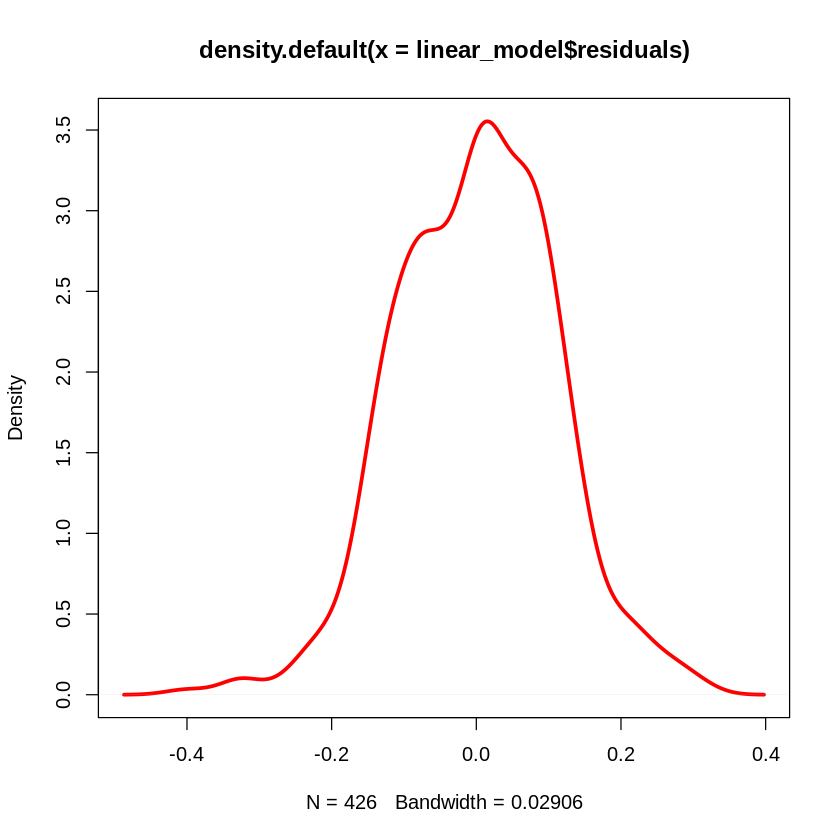

In [109]:
plot(density(linear_model$residuals),col='red',lwd=3)
skewness(linear_model$residuals)
t=shapiro.test(linear_model$residuals)$p.value
print(t)

The distribution shape shows somewhat normal distribution and p-value of Shapiro-Wik test is 1.6%, indicating that we cannot reject the null-hypothesis: data has normal distribution, at $\alpha$=5% 

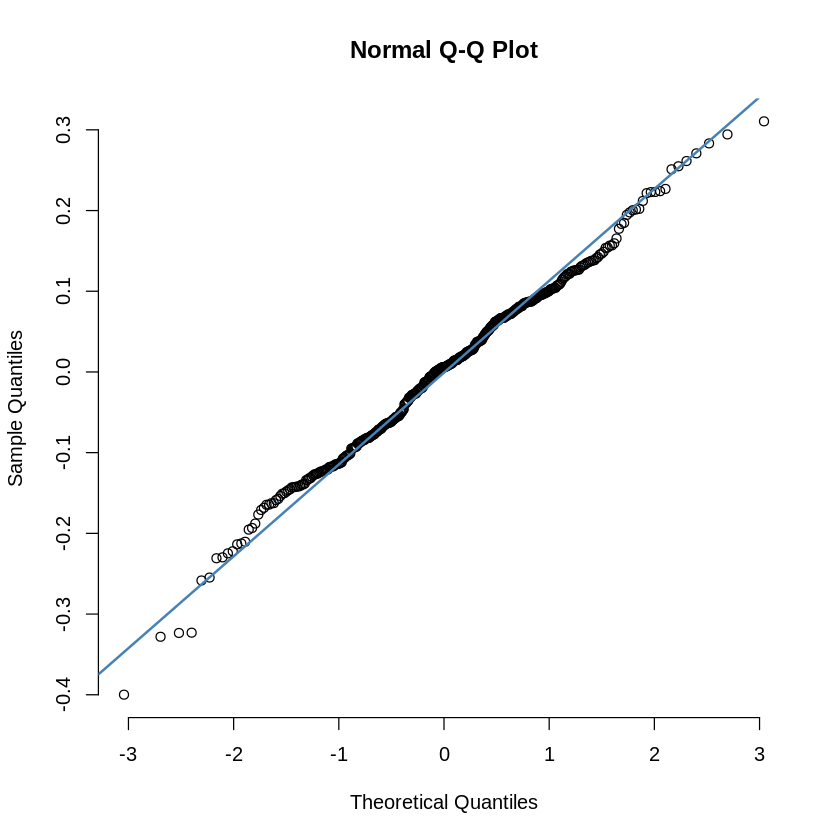

In [110]:
qqnorm(linear_model$resid, pch = 1, frame = FALSE)
qqline(linear_model$resid, col = "steelblue", lwd = 2)

QQ plot also further confirms the normal shape of residuals. We can also check to see that residuals have constant variance.

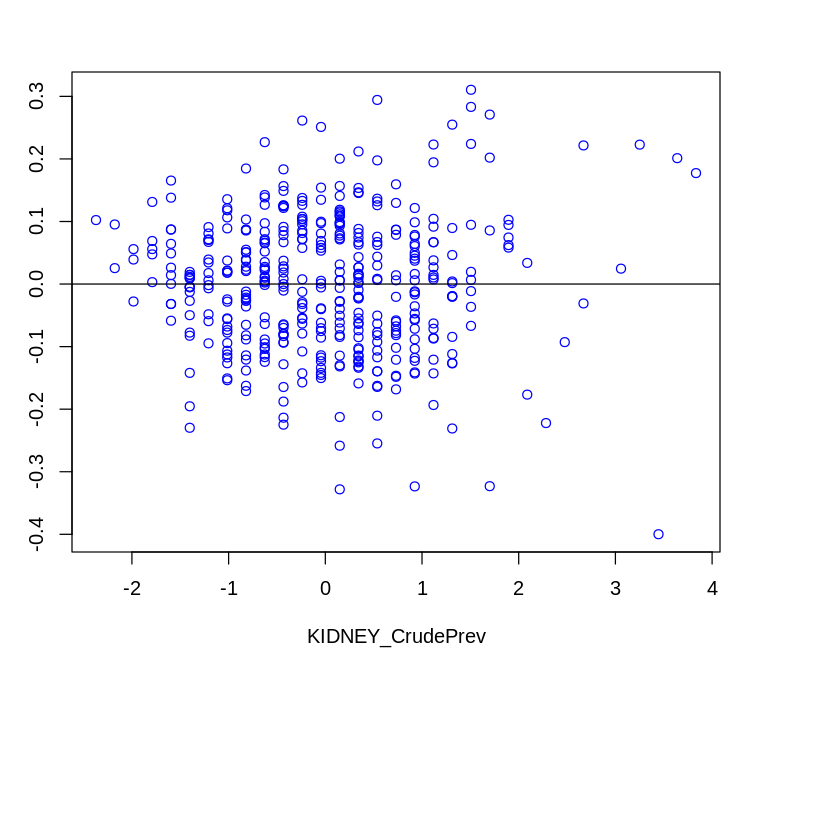

In [111]:
par(mar=c(12, 3, 3, 5))
plot(train_scaled$KIDNEY_CrudePrev, linear_model$resid, 
        ylab="Residuals", xlab="KIDNEY_CrudePrev",col='blue') 
abline(0,0);

In [66]:
# use the Metrics package to get some quantitative error metrics
install.packages('Metrics')
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




In [67]:
#create a function to calculate prediction accuracy
pred_accuracy<-function(prediction,actual) {
  # calculate Root Mean Square Error
  RMSE <- rmse(actual, # actual
               prediction) # predict
  MAPE <- mape(actual,prediction)
  data.frame(RMSE,MAPE)
}

In [112]:
predict_value<-predict(linear_model,test_scaled)
pred_accuracy(predict_value,test_scaled$STROKE_CrudePrev)

RMSE,MAPE
<dbl>,<dbl>
0.09593687,0.02642016


## Step-Wise Regression

Variables are added to or deleted from a model one at a time, until some stopping criterion is reached.<br>
* Forward Stepwise: add predictor variables to the model one at a time, stopping when the addition ofvariables would no longer improve the model.<br>
* Backward Stepwise: start with a model that includes all predictor variables, and then delete them one at a time until removing variables would degrade the quality of the model.<br>
* Both: combine the forward and backward stepwise approaches. Variables are entered one at a time, but at each step, the variables in the model are reevaluated, and those that don’t contribute to the model are deleted. A predictor variable may be added to, and deleted from, a model
several times before a final solution is reached

In [113]:
fit.full <- lm(STROKE_CrudePrev ~.,data = train_scaled)
summary(fit.full)


Call:
lm(formula = STROKE_CrudePrev ~ ., data = train_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39988 -0.07757  0.00600  0.07595  0.31054 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.984038   0.005353 557.492  < 2e-16 ***
ACCESS2_CrudePrev    -0.022239   0.013502  -1.647   0.1003    
BINGE_CrudePrev       0.005664   0.007900   0.717   0.4738    
BPHIGH_CrudePrev      0.021020   0.018750   1.121   0.2629    
CHECKUP_CrudePrev     0.014043   0.011874   1.183   0.2376    
CHOLSCREEN_CrudePrev  0.028514   0.012086   2.359   0.0188 *  
CSMOKING_CrudePrev    0.031627   0.017056   1.854   0.0644 .  
DENTAL_CrudePrev     -0.034903   0.015934  -2.191   0.0290 *  
DIABETES_CrudePrev    0.034624   0.023272   1.488   0.1376    
KIDNEY_CrudePrev      0.628857   0.017024  36.939  < 2e-16 ***
LPA_CrudePrev        -0.046516   0.018926  -2.458   0.0144 *  
SLEEP_CrudePrev      -0.033070   0.011076  -2.986   0.0030 ** 

In [114]:
install.packages('MASS')
library(MASS)

step.model <- stepAIC(fit.full, direction = "both", 
                      trace = FALSE)
summary(step.model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = STROKE_CrudePrev ~ ACCESS2_CrudePrev + CHOLSCREEN_CrudePrev + 
    CSMOKING_CrudePrev + DENTAL_CrudePrev + DIABETES_CrudePrev + 
    KIDNEY_CrudePrev + LPA_CrudePrev + SLEEP_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black + IncomePerCap, data = train_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40695 -0.07604  0.00166  0.07368  0.32346 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.984038   0.005358 556.924  < 2e-16 ***
ACCESS2_CrudePrev    -0.020171   0.013362  -1.510  0.13192    
CHOLSCREEN_CrudePrev  0.040944   0.009534   4.295 2.18e-05 ***
CSMOKING_CrudePrev    0.040212   0.014477   2.778  0.00573 ** 
DENTAL_CrudePrev     -0.028170   0.015117  -1.863  0.06312 .  
DIABETES_CrudePrev    0.039288   0.021267   1.847  0.06541 .  
KIDNEY_CrudePrev      0.633466   0.016366  38.706  < 2e-16 ***
LPA_CrudePrev        -0.037232   0.016718  -2.227  0.02648 *  
SLEEP_CrudePrev      -0.031

The signs of coefficients are the same as in full model. 

Higher rates of KIDNEY diseases and DIABETES usually go together with higher rate of stroke. This can be reduced by having more access to healthcare insurance and frequent dental checkup. 

I can also find that cities with higher income per capita and Hispanice people have lower rate of stroke. 

An intersting fact is that frequent checkup may associate with higher stroke rate. This is understandable as people who are prone to more diseases are more likely to visit the doctors.


In [115]:
AIC(fit.full)
AIC(step.model)

[1] -649.328

[1] -652.3134

AIC of new stepwise model is a bit lower than the full model. Nonetheless, this is not a significant improvement

In [116]:
predict_value<-predict(step.model,test_scaled)
pred_accuracy(predict_value,test_scaled$STROKE_CrudePrev)

RMSE,MAPE
<dbl>,<dbl>
0.09656431,0.02662241


It is apparent that stepwise does not improve RMSE and MAPE vs. baseline model

## Ridge Regression

I will apply Ridge Regression to introduce regularization into the model, in hopes of improving its predictive power.

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [117]:
dummies <- dummyVars(STROKE_CrudePrev ~ ., data = train_df)

train_dummies = predict(dummies, newdata = train_df[,select_variable])

test_dummies = predict(dummies, newdata = test_df[,select_variable])

print(dim(train_dummies)); print(dim(test_dummies))


[1] 426  16
[1] 74 16


In [74]:
install.packages('glmnet')
library(glmnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’


Loading required package: Matrix

Loaded glmnet 4.0-2



In [118]:

set.seed(123)
x = as.matrix(train_dummies)
y_train = train_df$STROKE_CrudePrev

x_test = as.matrix(test_dummies)
y_test = test_df$STROKE_CrudePrev

lambdas <- 10^seq(2, -3, by = -.1)
cv_ridge <- cv.glmnet(x, y_train, alpha = 0, lambda = lambdas,standardize=T)
optimal_lambda <- cv_ridge$lambda.min
optimal_lambda

[1] 0.001

In [119]:
ridge_model = glmnet(x, y_train, alpha = 0, family = 'gaussian', lambda = optimal_lambda,standardize =T)
summary(ridge_model)

          Length Class     Mode   
a0         1     -none-    numeric
beta      16     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       7     -none-    call   
nobs       1     -none-    numeric

In [120]:
prediction <- predict(ridge_model, s = optimal_lambda, newx = x_test)
pred_accuracy(prediction,y_test)

RMSE,MAPE
<dbl>,<dbl>
0.09609884,0.02652641


## Lasso Regression

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso.

In [121]:
set.seed(123)
lambdas <- 10^seq(2, -3, by = -.1)

# Setting alpha = 1 implements lasso regression
lasso_reg <- cv.glmnet(x, y_train, alpha = 1, lambda = lambdas, standardize = T, nfolds = 5)

# Best 
lambda_best <- lasso_reg$lambda.min 
lambda_best

[1] 0.001

In [122]:
lasso_model <- glmnet(x, y_train, alpha = 1, lambda = lambda_best, standardize = T)


In [123]:
prediction <- predict(lasso_model, s = lambda_best, newx = x_test)
pred_accuracy(prediction,y_test)

RMSE,MAPE
<dbl>,<dbl>
0.09479014,0.02602715


Lasso model yields the best result in terms of RMSE.

Let's also look at the coefficients from lasso model

In [124]:
format(round(coef(lasso_model),6))


,s0
(Intercept),-0.904202
ACCESS2_CrudePrev,-0.002974
BINGE_CrudePrev,0.001522
BPHIGH_CrudePrev,0.004943
CHECKUP_CrudePrev,0.001606
CHOLSCREEN_CrudePrev,0.004704
CSMOKING_CrudePrev,0.008328
DENTAL_CrudePrev,-0.003642
DIABETES_CrudePrev,0.011569
KIDNEY_CrudePrev,1.222261


The coefficient of IncomePerCap is minimal, hence could we we drop this variable from the model?

In [130]:
x1<-x[,c(-15)]
x_test1<-x_test[,c(-15)]

lasso_model1 <- glmnet(x1, y_train, alpha = 1, lambda = lambda_best, standardize = T)
prediction1 <- predict(lasso_model1, s = lambda_best, newx = x_test1)
pred_accuracy(prediction1,y_test)

RMSE,MAPE
<dbl>,<dbl>
0.09520339,0.0261632


The RMSE and MAPE are now higher than previous lasso model. However, the metrics still improve vs. linear regression.

## Elastic Net Regression

Elastic net regression combines the properties of ridge and lasso regression. It works by penalizing the model using both the 1l2-norm1 and the 1l1-norm1

https://www.pluralsight.com/guides/linear-lasso-and-ridge-regression-with-r

https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

In [131]:
set.seed(123)
# Set training control
train_cont <- trainControl(method = "repeatedcv",
                              number = 5,
                              repeats = 5,
                              search = "random",
                              verboseIter = TRUE)

# Train the model
elastic_model <- train(STROKE_CrudePrev ~ .,
                           data = train_df,
                           method = "glmnet",
                           preProcess = c("center", "scale"),
                           tuneLength = 25,
                           trControl = train_cont)


# Best tuning parameter
elastic_model$bestTune

+ Fold1.Rep1: alpha=0.40898, lambda=0.206447 
- Fold1.Rep1: alpha=0.40898, lambda=0.206447 
+ Fold1.Rep1: alpha=0.88302, lambda=0.013222 
- Fold1.Rep1: alpha=0.88302, lambda=0.013222 
+ Fold1.Rep1: alpha=0.94047, lambda=0.003676 
- Fold1.Rep1: alpha=0.94047, lambda=0.003676 
+ Fold1.Rep1: alpha=0.04556, lambda=5.733098 
- Fold1.Rep1: alpha=0.04556, lambda=5.733098 
+ Fold1.Rep1: alpha=0.52811, lambda=3.317020 
- Fold1.Rep1: alpha=0.52811, lambda=3.317020 
+ Fold1.Rep1: alpha=0.89242, lambda=0.492832 
- Fold1.Rep1: alpha=0.89242, lambda=0.492832 
+ Fold1.Rep1: alpha=0.55144, lambda=1.266701 
- Fold1.Rep1: alpha=0.55144, lambda=1.266701 
+ Fold1.Rep1: alpha=0.45661, lambda=0.001219 
- Fold1.Rep1: alpha=0.45661, lambda=0.001219 
+ Fold1.Rep1: alpha=0.95683, lambda=0.072361 
- Fold1.Rep1: alpha=0.95683, lambda=0.072361 
+ Fold1.Rep1: alpha=0.45333, lambda=0.907503 
- Fold1.Rep1: alpha=0.45333, lambda=0.907503 
+ Fold1.Rep1: alpha=0.67757, lambda=0.006864 
- Fold1.Rep1: alpha=0.67757, lambd

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Aggregating results
Selecting tuning parameters
Fitting alpha = 0.457, lambda = 0.00122 on full training set


,alpha,lambda
,<dbl>,<dbl>
8,0.4566147,0.001219054


In [132]:
predict_value<-predict(elastic_model,x_test)
pred_accuracy(predict_value,y_test)

RMSE,MAPE
<dbl>,<dbl>
0.09513621,0.0261347


Elastic Net does not yield better RMSE and MAPE than Lasso Regression; however it outperforms baseline model

## Classification

There are other methods which we can use to yield better prediction, ranging from Decision Tree Regressor to Random Forest and XGBoost. 

However, I came up with an idea: should we strive towards reducing RMSE and MAPE? Does an accurate prediction of stroke rate at every city help anything for the health authority? Will they want to know **exactly** the stroke rate or they just want to have some important warnings from our prediction for further preventative actions?

In order to answer this question, we may have to get consultation from the health practitioners. Here, I will assume that the city council expect to know if the predicted stroke rate at their place will exceed a threshold or not? If it exceeds, more appropriate solutions such as providing access to healthcare services should be implemented.

What is an appropriate threshold? It could be the national median stroke rate. Since this data is not readily available, I assume that the sample median in 500 cities data is the population median.




In [134]:
#store median value
thres<-median(final_df$STROKE_CrudePrev)
thres

[1] 2.9

This is a classification problem. We will use the available features to predict if a city has stroke rate > national median (classified as 1) or not

In [214]:
#Create a feature called class as target variable

convert_value<-function(x) {if (x>thres){x=1}else {x=0}}
train_scaled$class<-lapply(train_scaled$STROKE_CrudePrev,FUN=convert_value)
train_scaled$class<-as.numeric(train_scaled$class) #convert from list to numeric value

In [215]:
 train_scaled[c(1:10),which(colnames(train_scaled) %in% c('class','STROKE_CrudePrev'))]


,STROKE_CrudePrev,class
,<dbl>,<dbl>
1,2.3,0
2,4.5,1
3,4.2,1
4,3.4,1
5,2.2,0
6,3.1,1
7,5.0,1
8,2.1,0
9,3.4,1


In [169]:
#Fit the model
logit_full <- glm(train_scaled$class ~.-STROKE_CrudePrev, family='binomial', data=train_scaled)
summary(logit_full)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = train_scaled$class ~ . - STROKE_CrudePrev, family = "binomial", 
    data = train_scaled)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.88361  -0.00023   0.00000   0.00051   2.68195  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.7517     0.5699   1.319 0.187123    
ACCESS2_CrudePrev     -2.4794     1.2448  -1.992 0.046394 *  
BINGE_CrudePrev        2.0422     0.7859   2.599 0.009358 ** 
BPHIGH_CrudePrev       0.1121     2.0013   0.056 0.955329    
CHECKUP_CrudePrev     -0.2016     1.3045  -0.155 0.877210    
CHOLSCREEN_CrudePrev  -1.6076     1.0535  -1.526 0.126996    
CSMOKING_CrudePrev     0.3566     1.5174   0.235 0.814194    
DENTAL_CrudePrev       2.4213     2.0167   1.201 0.229901    
DIABETES_CrudePrev    11.1514     4.6556   2.395 0.016608 *  
KIDNEY_CrudePrev      14.0416     3.6777   3.818 0.000135 ***
LPA_CrudePrev         -0.1915     1.5992  -0.120 0.904670    
SLEEP_

In [227]:
step_logit =stepAIC(logit_full,
                      trace= TRUE)

Start:  AIC=75.17
train_scaled$class ~ (ACCESS2_CrudePrev + BINGE_CrudePrev + BPHIGH_CrudePrev + 
    CHECKUP_CrudePrev + CHOLSCREEN_CrudePrev + CSMOKING_CrudePrev + 
    DENTAL_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    LPA_CrudePrev + SLEEP_CrudePrev + STROKE_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black + IncomePerCap + HospitalPerCap) - STROKE_CrudePrev



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance     AIC
- BPHIGH_CrudePrev      1   41.175  73.175
- LPA_CrudePrev         1   41.187  73.187
- CHECKUP_CrudePrev     1   41.196  73.196
- HospitalPerCap        1   41.197  73.197
- CSMOKING_CrudePrev    1   41.228  73.228
- IncomePerCap          1   41.832  73.832
- DENTAL_CrudePrev      1   42.907  74.907
<none>                      41.172  75.172
- Black                 1   43.585  75.585
- CHOLSCREEN_CrudePrev  1   43.902  75.902
- SLEEP_CrudePrev       1   45.267  77.267
- ACCESS2_CrudePrev     1   46.189  78.189
- TEETHLOST_CrudePrev   1   50.299  82.299
- BINGE_CrudePrev       1   51.440  83.440
- Hispanic              1   55.272  87.272
- DIABETES_CrudePrev    1   56.528  88.528
- KIDNEY_CrudePrev      1  102.896 134.896


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=73.18
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHECKUP_CrudePrev + 
    CHOLSCREEN_CrudePrev + CSMOKING_CrudePrev + DENTAL_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + LPA_CrudePrev + SLEEP_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black + IncomePerCap + HospitalPerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance     AIC
- LPA_CrudePrev         1   41.188  71.188
- HospitalPerCap        1   41.206  71.206
- CHECKUP_CrudePrev     1   41.207  71.207
- CSMOKING_CrudePrev    1   41.251  71.251
- IncomePerCap          1   41.893  71.893
<none>                      41.175  73.175
- DENTAL_CrudePrev      1   43.488  73.488
- Black                 1   43.587  73.587
- CHOLSCREEN_CrudePrev  1   44.480  74.480
- SLEEP_CrudePrev       1   45.305  75.305
- ACCESS2_CrudePrev     1   46.225  76.225
- TEETHLOST_CrudePrev   1   51.341  81.341
- BINGE_CrudePrev       1   51.465  81.465
- Hispanic              1   62.068  92.068
- DIABETES_CrudePrev    1   62.216  92.216
- KIDNEY_CrudePrev      1  109.135 139.135


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=71.19
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHECKUP_CrudePrev + 
    CHOLSCREEN_CrudePrev + CSMOKING_CrudePrev + DENTAL_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + SLEEP_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black + IncomePerCap + HospitalPerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance     AIC
- HospitalPerCap        1   41.228  69.228
- CSMOKING_CrudePrev    1   41.251  69.251
- CHECKUP_CrudePrev     1   41.281  69.281
- IncomePerCap          1   41.910  69.910
<none>                      41.188  71.188
- DENTAL_CrudePrev      1   43.566  71.566
- Black                 1   43.939  71.939
- CHOLSCREEN_CrudePrev  1   44.577  72.577
- SLEEP_CrudePrev       1   45.808  73.808
- ACCESS2_CrudePrev     1   47.957  75.957
- TEETHLOST_CrudePrev   1   51.518  79.518
- BINGE_CrudePrev       1   51.850  79.850
- DIABETES_CrudePrev    1   62.653  90.653
- Hispanic              1   62.714  90.714
- KIDNEY_CrudePrev      1  109.361 137.361


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=69.23
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHECKUP_CrudePrev + 
    CHOLSCREEN_CrudePrev + CSMOKING_CrudePrev + DENTAL_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + SLEEP_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance     AIC
- CHECKUP_CrudePrev     1   41.284  67.284
- CSMOKING_CrudePrev    1   41.296  67.296
- IncomePerCap          1   42.079  68.079
<none>                      41.228  69.228
- DENTAL_CrudePrev      1   43.686  69.686
- Black                 1   44.219  70.219
- CHOLSCREEN_CrudePrev  1   44.973  70.973
- SLEEP_CrudePrev       1   46.010  72.010
- ACCESS2_CrudePrev     1   48.060  74.060
- BINGE_CrudePrev       1   51.852  77.852
- TEETHLOST_CrudePrev   1   52.075  78.075
- Hispanic              1   62.736  88.736
- DIABETES_CrudePrev    1   63.323  89.323
- KIDNEY_CrudePrev      1  109.386 135.386


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=67.28
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHOLSCREEN_CrudePrev + 
    CSMOKING_CrudePrev + DENTAL_CrudePrev + DIABETES_CrudePrev + 
    KIDNEY_CrudePrev + SLEEP_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                       Df Deviance     AIC
- CSMOKING_CrudePrev    1   41.316  65.316
- IncomePerCap          1   42.199  66.199
<none>                      41.284  67.284
- Black                 1   44.238  68.238
- DENTAL_CrudePrev      1   44.341  68.341
- CHOLSCREEN_CrudePrev  1   45.235  69.235
- SLEEP_CrudePrev       1   47.313  71.313
- ACCESS2_CrudePrev     1   48.621  72.621
- BINGE_CrudePrev       1   51.855  75.855
- TEETHLOST_CrudePrev   1   52.191  76.191
- Hispanic              1   63.074  87.074
- DIABETES_CrudePrev    1   64.247  88.247
- KIDNEY_CrudePrev      1  111.133 135.133


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=65.32
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHOLSCREEN_CrudePrev + 
    DENTAL_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    SLEEP_CrudePrev + TEETHLOST_CrudePrev + Hispanic + Black + 
    IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                       Df Deviance     AIC
- IncomePerCap          1   42.292  64.292
<none>                      41.316  65.316
- Black                 1   44.261  66.261
- DENTAL_CrudePrev      1   44.559  66.559
- CHOLSCREEN_CrudePrev  1   45.723  67.723
- SLEEP_CrudePrev       1   47.508  69.508
- ACCESS2_CrudePrev     1   48.686  70.686
- BINGE_CrudePrev       1   52.803  74.803
- TEETHLOST_CrudePrev   1   56.821  78.821
- DIABETES_CrudePrev    1   64.266  86.266
- Hispanic              1   74.122  96.122
- KIDNEY_CrudePrev      1  112.531 134.531


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=64.29
train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + CHOLSCREEN_CrudePrev + 
    DENTAL_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    SLEEP_CrudePrev + TEETHLOST_CrudePrev + Hispanic + Black



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                       Df Deviance     AIC
<none>                      42.292  64.292
- Black                 1   44.625  64.625
- DENTAL_CrudePrev      1   45.325  65.325
- SLEEP_CrudePrev       1   47.854  67.854
- ACCESS2_CrudePrev     1   49.559  69.559
- CHOLSCREEN_CrudePrev  1   49.731  69.731
- BINGE_CrudePrev       1   53.013  73.013
- TEETHLOST_CrudePrev   1   61.577  81.577
- DIABETES_CrudePrev    1   64.770  84.770
- Hispanic              1   74.542  94.542
- KIDNEY_CrudePrev      1  117.394 137.394


In [228]:
summary(step_logit)


Call:
glm(formula = train_scaled$class ~ ACCESS2_CrudePrev + BINGE_CrudePrev + 
    CHOLSCREEN_CrudePrev + DENTAL_CrudePrev + DIABETES_CrudePrev + 
    KIDNEY_CrudePrev + SLEEP_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black, family = "binomial", data = train_scaled)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.75262  -0.00031   0.00000   0.00043   2.66582  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.8610     0.4966   1.734 0.082964 .  
ACCESS2_CrudePrev     -2.5431     1.0945  -2.324 0.020151 *  
BINGE_CrudePrev        2.0817     0.8089   2.573 0.010070 *  
CHOLSCREEN_CrudePrev  -1.9291     0.8431  -2.288 0.022129 *  
DENTAL_CrudePrev       2.1857     1.3677   1.598 0.110027    
DIABETES_CrudePrev    10.8300     3.3552   3.228 0.001248 ** 
KIDNEY_CrudePrev      14.4704     3.5292   4.100 4.13e-05 ***
SLEEP_CrudePrev       -1.3779     0.6039  -2.282 0.022510 *  
TEETHLOST_CrudePrev    5.5

The model interpretation is similar to linear regression. We can easily find that Diabetes, Kindney and Teethlost will contribute to higher probability of having stroke rate above national median. The impact is the same for Blacks ratio and Binge Drinking.

For the factors that can  inhibit higher stroke risk, we have Access to insurance to be an important variable. Cities that have lower rate of Hispanic also tend to have lower odds of higher-than-median stroke rate.



In [229]:
train_scaled$Probability=predict(step_logit,train_scaled,type='response')

for (i in seq(0.1,0.9,by=0.1)) {
train_scaled$pred<-1*(train_scaled$Probability>=i)
print(c(i,auc(train_scaled$class,train_scaled$pred)))}

[1] 0.1000000 0.9701873
[1] 0.2000000 0.9724704
[1] 0.3000000 0.9746211
[1] 0.4000000 0.9767719
[1] 0.5000000 0.9813381
[1] 0.6000000 0.9740917
[1] 0.700000 0.966713
[1] 0.80000 0.97343
[1] 0.9000000 0.9613527


In order to decide which probability threshold can be used for classifying positive class. I ran a for-loop and printed the AUC for each threshold.

Since probability >=0.5 yield the highest AUC, I would use this number for test prediction.

In [239]:
test_scaled$Probability=predict(step_logit,test_scaled,type='response')
test_df$pred<-1*(test_scaled$Probability>=0.5)

To evaluate the classification result, we will use the confusion matrix

In [91]:
#import package for confusion matrix
install.packages('e1071')
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness




In [240]:
confusionMatrix(table(test_df$pred,test_df$class),positive = "1")


Confusion Matrix and Statistics

   
     0  1
  0 37  3
  1  1 33
                                          
               Accuracy : 0.9459          
                 95% CI : (0.8673, 0.9851)
    No Information Rate : 0.5135          
    P-Value [Acc > NIR] : 3.75e-16        
                                          
                  Kappa : 0.8917          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9167          
            Specificity : 0.9737          
         Pos Pred Value : 0.9706          
         Neg Pred Value : 0.9250          
             Prevalence : 0.4865          
         Detection Rate : 0.4459          
   Detection Prevalence : 0.4595          
      Balanced Accuracy : 0.9452          
                                          
       'Positive' Class : 1               
                                          

In [241]:
auc(test_df$class,test_df$pred)

[1] 0.9451754

Apart from logistic regression, I will predict the absolute stroke rate using previous regression approaches. Then classify the prediction as positive (higher than median) or not, and compare the outcome with actual class.

In [242]:
#Create a feature called class as target variable
convert_value<-function(x) {if (x>thres){x=1}else {x=0}} #1 means higher than threshold (median)
test_df$class<-lapply(test_df$STROKE_CrudePrev,FUN=convert_value)
test_df$class<-as.numeric(test_df$class) #convert from list to numeric value

In [243]:
 #cross-check data
 test_df[c(1:10),which(colnames(test_df) %in% c('class','STROKE_CrudePrev'))]


,STROKE_CrudePrev,class
,<dbl>,<dbl>
10,4.0,1
18,3.1,1
28,2.6,0
29,3.2,1
31,2.5,0
33,3.0,1
44,3.0,1
48,3.8,1
55,2.3,0


In [244]:
test_df$prediction=predict(step.model,test_scaled)

In [245]:
head(test_df,10)

,ACCESS2_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,HospitalPerCap,pred,class,prediction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,15.8,13.7,37.9,70.5,70.4,25.4,54.7,12.7,3.4,35.1,35.1,4.0,23.5,17.080959,8.5278832,23946.97,6.089578e-05,1,1,4.017771
18,17.4,16.4,28.2,64.9,71.6,18.9,59.9,10.0,3.1,25.7,37.3,3.1,15.1,36.303049,6.0808380,23875.93,3.420428e-05,1,1,3.204162
28,10.3,17.7,27.0,63.1,75.3,14.2,68.7,8.9,2.6,18.6,33.5,2.6,12.0,29.590736,2.8875705,30370.21,1.813204e-05,0,0,2.552322
29,25.0,16.8,27.9,60.7,64.0,17.0,53.4,11.1,3.2,28.1,31.6,3.2,18.9,72.606910,0.9632817,19851.06,8.769391e-06,1,1,3.094503
31,12.6,20.9,24.8,63.6,72.4,13.6,68.2,8.2,2.5,18.4,33.3,2.5,10.8,33.100668,2.1697931,36351.10,1.525483e-05,0,0,2.312180
33,28.2,16.2,26.5,61.6,63.5,17.0,46.4,11.7,3.2,29.2,39.7,3.0,18.0,87.966557,8.1081089,14487.98,1.374627e-05,0,1,2.971276
44,9.7,16.6,28.3,67.3,78.6,13.3,66.4,9.5,2.9,18.6,34.6,3.0,10.0,18.150052,1.5496145,33007.40,4.434218e-05,0,1,2.972603
48,22.6,15.5,31.5,63.3,66.2,19.1,47.8,12.8,3.6,29.4,41.3,3.8,22.9,64.271092,11.7567238,15832.93,1.001987e-05,1,1,3.834856
55,9.8,20.0,26.4,65.7,76.0,13.8,69.6,8.0,2.4,18.7,37.3,2.3,10.0,28.941859,5.5394256,31716.03,1.592116e-05,0,0,2.232877


In [248]:
test_df$pred<-lapply(test_df$prediction,FUN=convert_value)
test_df$pred<-as.numeric(test_df$pred) #convert from list to numeric value

In [249]:
confusionMatrix(table(test_df$pred,test_df$class),positive = "1")


Confusion Matrix and Statistics

   
     0  1
  0 35  0
  1  3 36
                                          
               Accuracy : 0.9595          
                 95% CI : (0.8861, 0.9916)
    No Information Rate : 0.5135          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.919           
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9211          
         Pos Pred Value : 0.9231          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4865          
         Detection Rate : 0.4865          
   Detection Prevalence : 0.5270          
      Balanced Accuracy : 0.9605          
                                          
       'Positive' Class : 1               
                                          

Classification using stepwise regression yields very satisfactory result. Accuracy is 0.96 vs. 0.94 of logistic regression, the Recall (sensitity) is 100% !!!










In [251]:
auc(test_df$class,test_df$pred)

[1] 0.9605263

AUC is also improved significantly!!!

Now, I will create the classification model with lasso regression

In [220]:
t<- predict(lasso_model, s = lambda_best, newx = x_test)
test_df$prediction<-t

In [221]:
test_df$pred<-lapply(test_df$prediction,FUN=convert_value)
test_df$pred<-as.numeric(test_df$pred) #convert from list to numeric value

In [247]:
confusionMatrix(table(test_df$pred,test_df$class),positive = "1")


Confusion Matrix and Statistics

   
     0  1
  0 35  0
  1  3 36
                                          
               Accuracy : 0.9595          
                 95% CI : (0.8861, 0.9916)
    No Information Rate : 0.5135          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.919           
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9211          
         Pos Pred Value : 0.9231          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4865          
         Detection Rate : 0.4865          
   Detection Prevalence : 0.5270          
      Balanced Accuracy : 0.9605          
                                          
       'Positive' Class : 1               
                                          

The result is similar to the one created by stepwise regression

# **Conclusion**

This is my first project exploring healthcare dataset. It does not only provide me opportunity to practice cleaning and joining multiple datasources, but also gave me insights on the potential issues of an analytical research. 

Some key findings which I have learnt so far:

**1. It is essential to set clear goals before starting an analysis, whether we are doing an explanatory or exploratory research.**

With a question in mind, we will know which data assets we need to invest on, what kinds of methods should we deploy and what an "acceptable" KPI is

For this 500 cities project,I first attempted to run more complicated predictive modelling, such as Ensemble Learning, to minimize RMSE. However, having a small RMSE might not help anything for the policy maker: our stakeholder. They do not want you to give them a completely accurate stroke rate. It does not matter much if you predict 4% stroke rate in next year, but it then turns out to be 4.5%. The key here is that you give them a warning signal: stroke rate might rise above normal threshold and we should do something to reverse the trend.


**2. Be careful at interpreting the coefficients and the relationship between independent and target variables**

It is tempting for beginners to easily conclude the causal relationship from the model output of a linear regression. The sign of coefficients depend on many factors, including, but not limited to, multicollinearity and endogeneity.

The regression output of my STROKE rate points out some interesting findings: the less people sleep, the lower the risk of stroke; or the more people visit a dentist, the higher the stroke rate in the region. These can be merely correlation and there are obviously other factors impacting behind. It is probable that people visit dentists often are those who have teeth lost because of their old ages. Old age could be the main player here since younger people are less likely to face stroke problem. To better explain the relationship, a more prudent and thorough research should be made.


**3. More simple models may be sufficient**

Just as point 1 already mentioned. Once we are clear with our research purposes, we might find that a simple linear regression can still deliver results. Spending more effort on sophisticated models is not necessary any more.

Data analysts usually find it hard to resist to trying multiple machine learning models. However, we should bear in mind the constraints and initial requirements of our reserch.